# <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:150%"><b> Table of contents </b></h1>

 - [**Introduction**](#1)

 - [**Explore**](#2)
 
 - [**Pre-processing and feature selection**](#3)
    
 - [**Modelling and Evaluation**](#4)
    - [**Support Vector Machines**](#4_1)
    - [**Logistical Classification**](#4_2)
    - [**Decision Tree**](#4_3)
    - [**Random Forest**](#4_4)
    - [**Gradient Boosting Classifier**](#4_5)
    - [**Neural Network MLP**](#4_6)
    
 - [**Evaluate**](#5)

   

<a id='1'></a>
<p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Introduction</b>

<a id='2'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Explore</b>

In [1]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)
 
# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [2]:
df = pd.read_csv('dataset.csv')
# df = pd.read_csv('ai4i2020.csv')


In [3]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [6]:
null_counts = df.isnull().sum()
print(null_counts)

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Product ID,10000,10000,M14860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10000,3,L,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],10000.0,NaN,NaN,NaN,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,NaN,NaN,NaN,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,NaN,NaN,NaN,1538.7761,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,NaN,NaN,NaN,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,NaN,NaN,NaN,107.951,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,NaN,NaN,NaN,0.0339,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,NaN,NaN,NaN,0.0046,0.067671,0.0,0.0,0.0,0.0,1.0


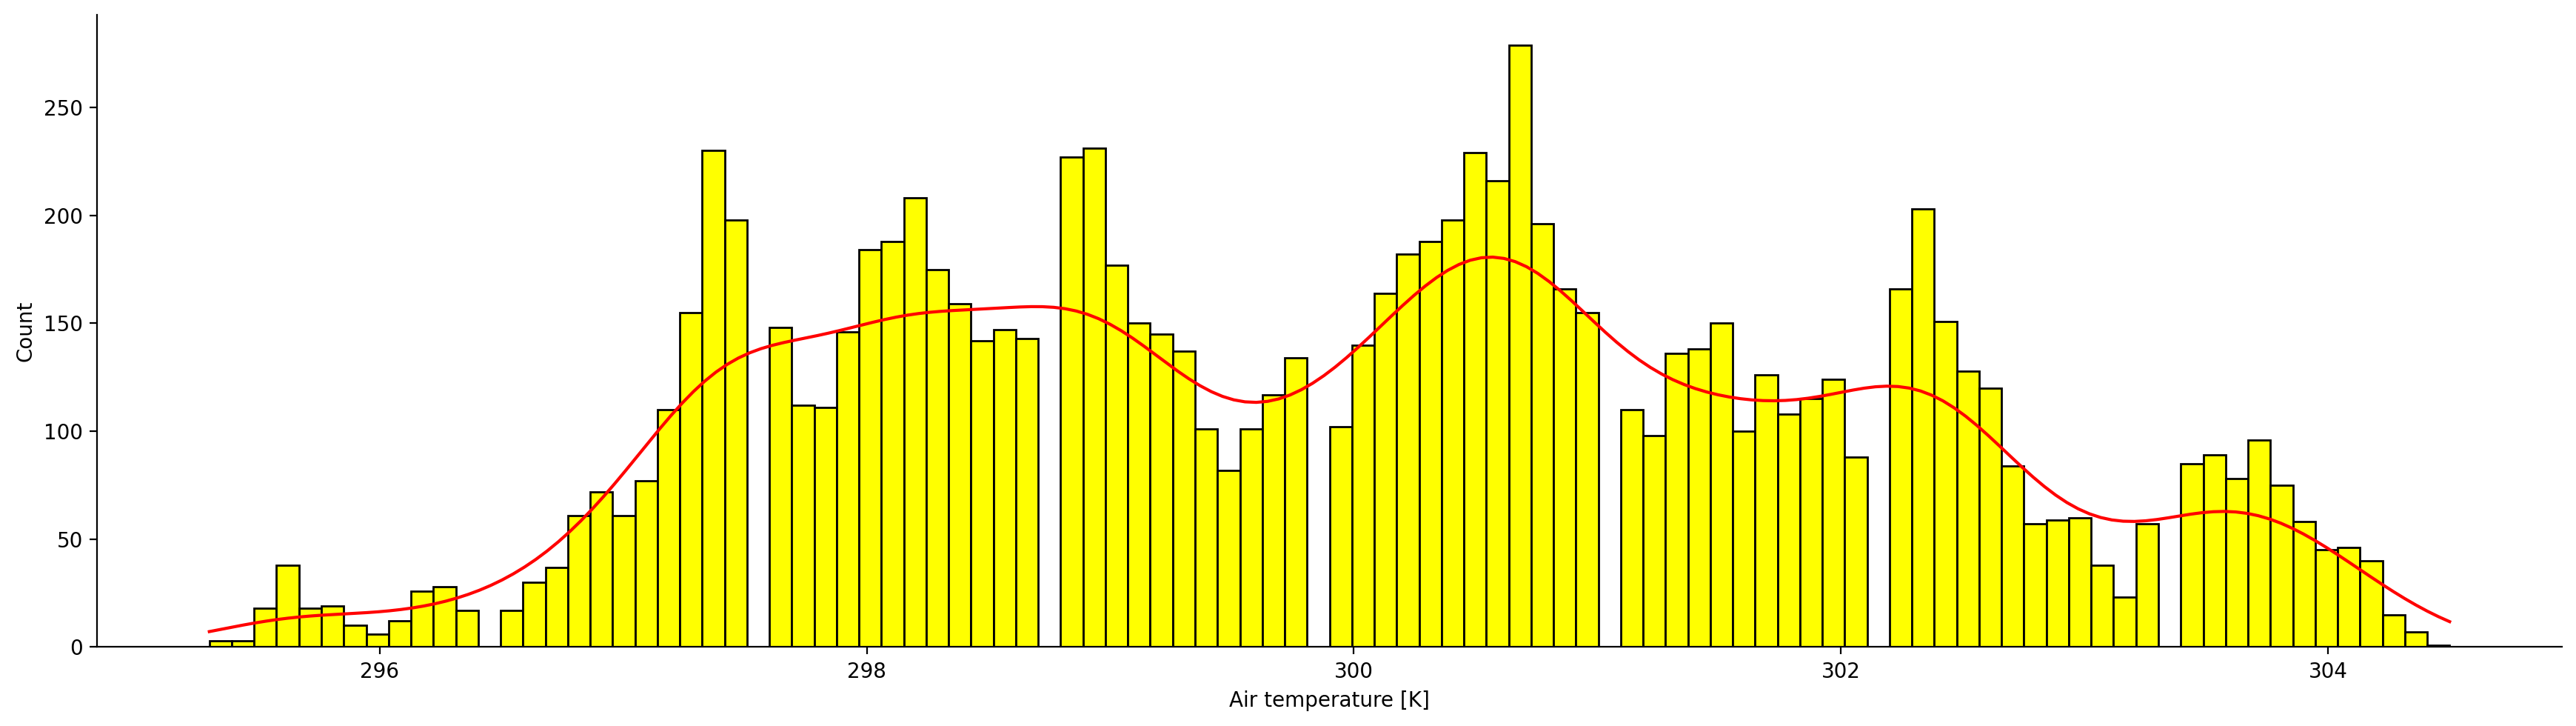

In [8]:
sns.displot(data=df, x="Air temperature [K]", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 5, aspect = 3.5);

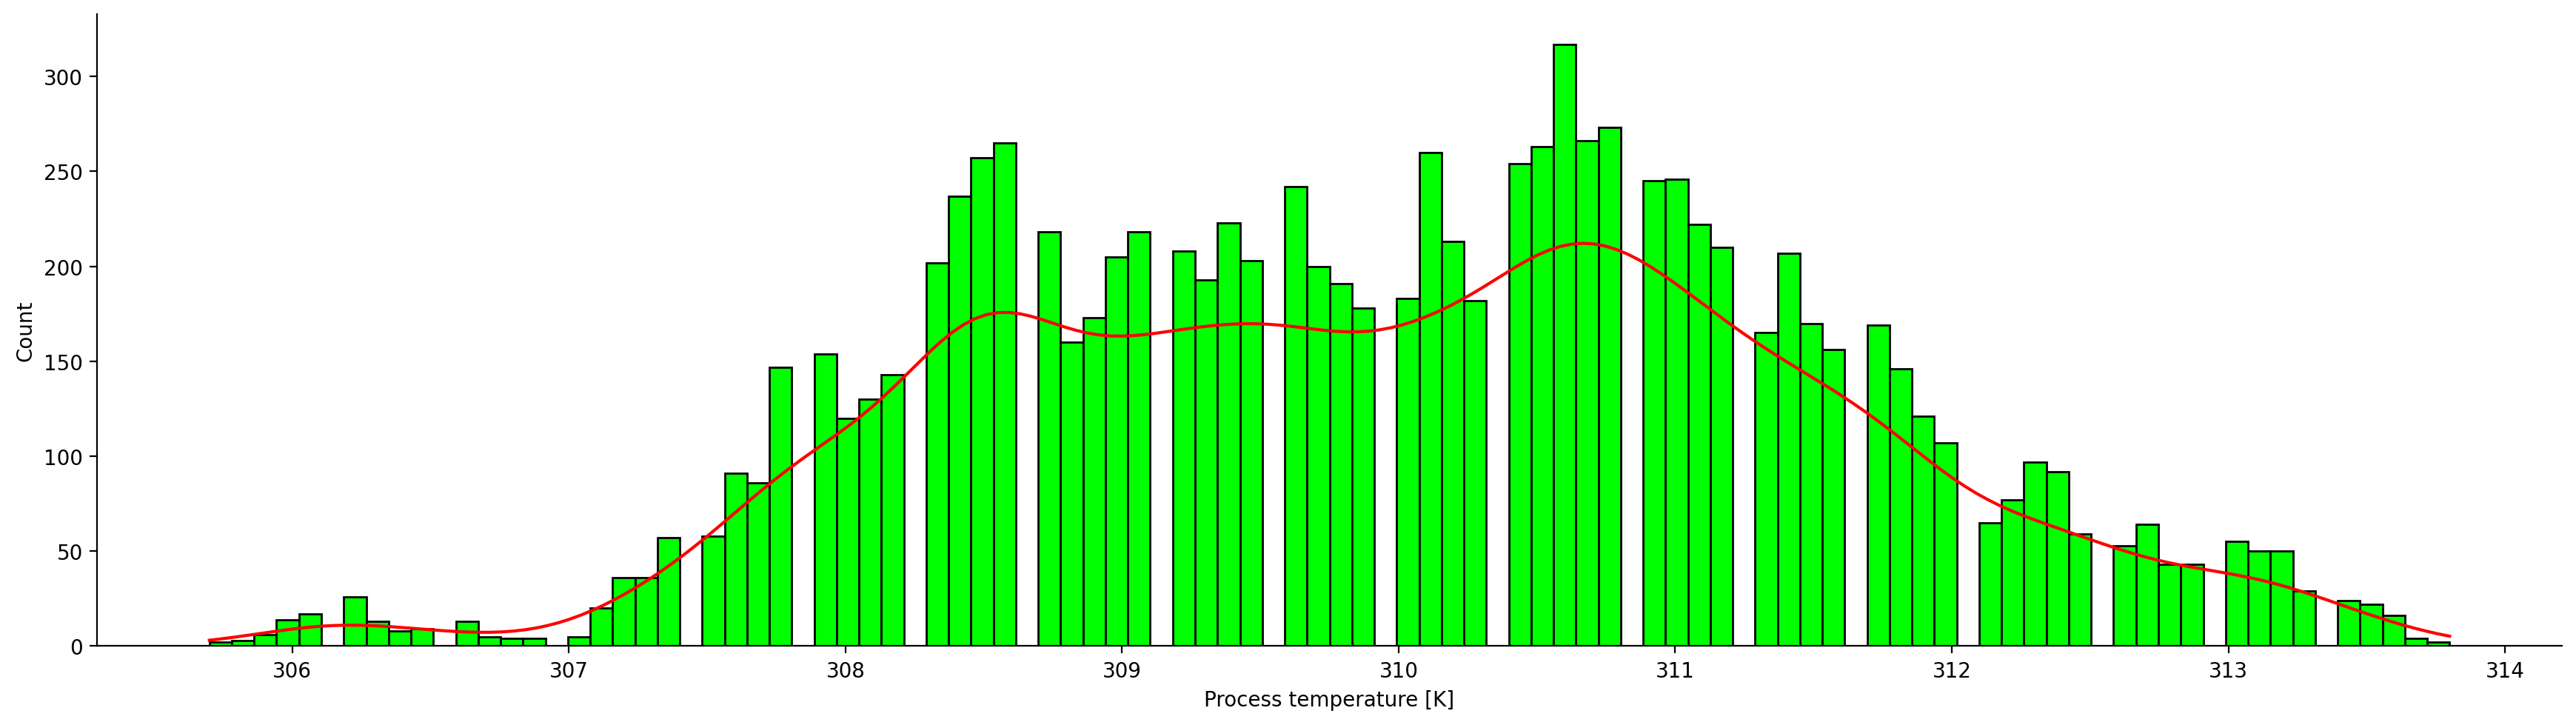

In [9]:
sns.displot(data=df, x="Process temperature [K]", kde=True, bins = 100,color = "red", facecolor = "lime",height = 5, aspect = 3.5);

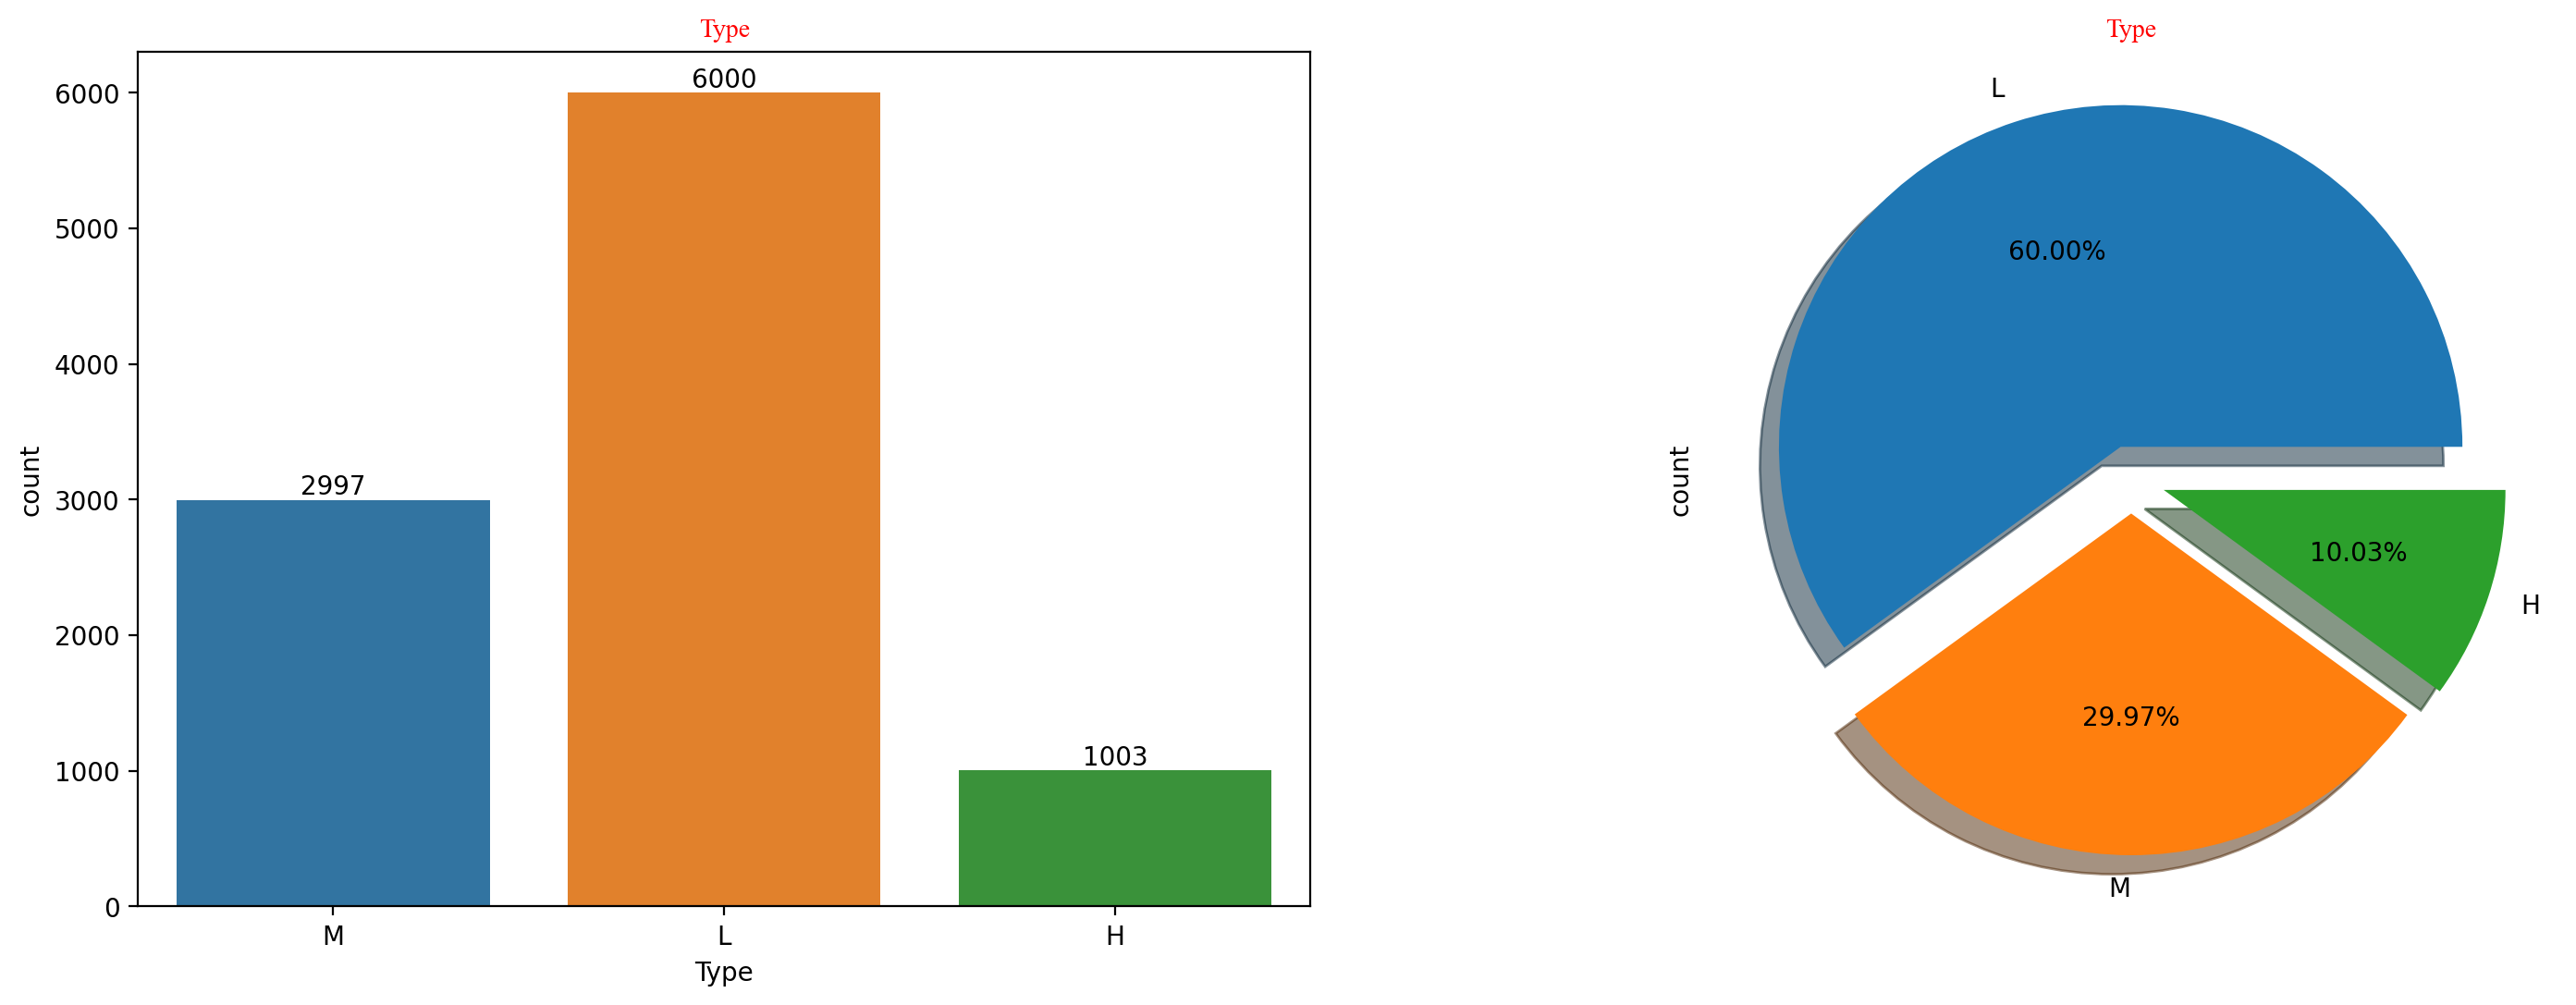

In [10]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 20,color='Red',font='Times New Roman');

In [11]:
df.head(2)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0


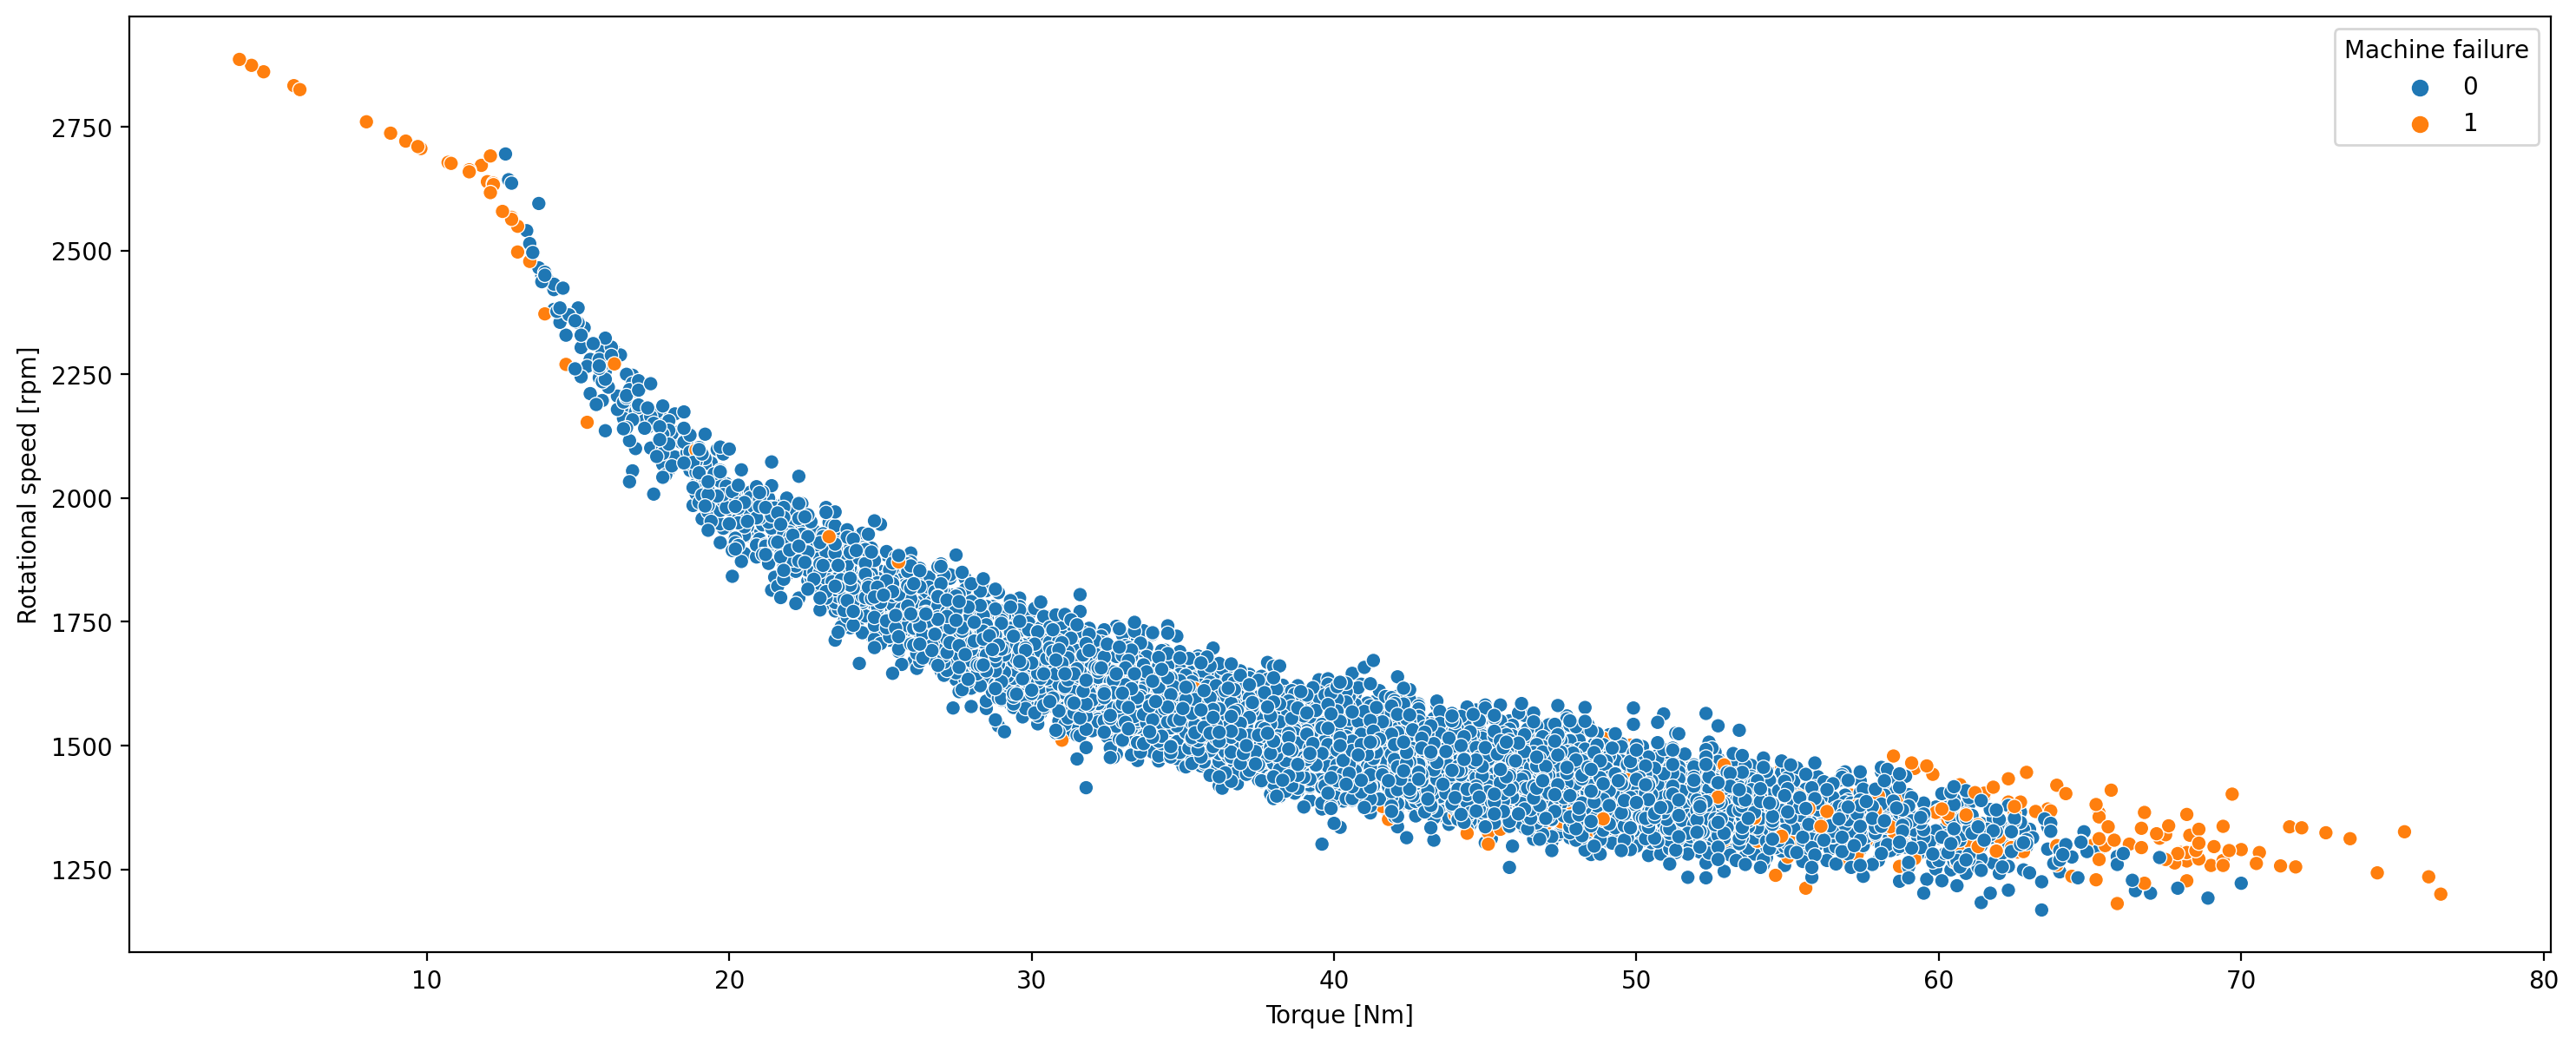

In [12]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Machine failure",palette="tab10");

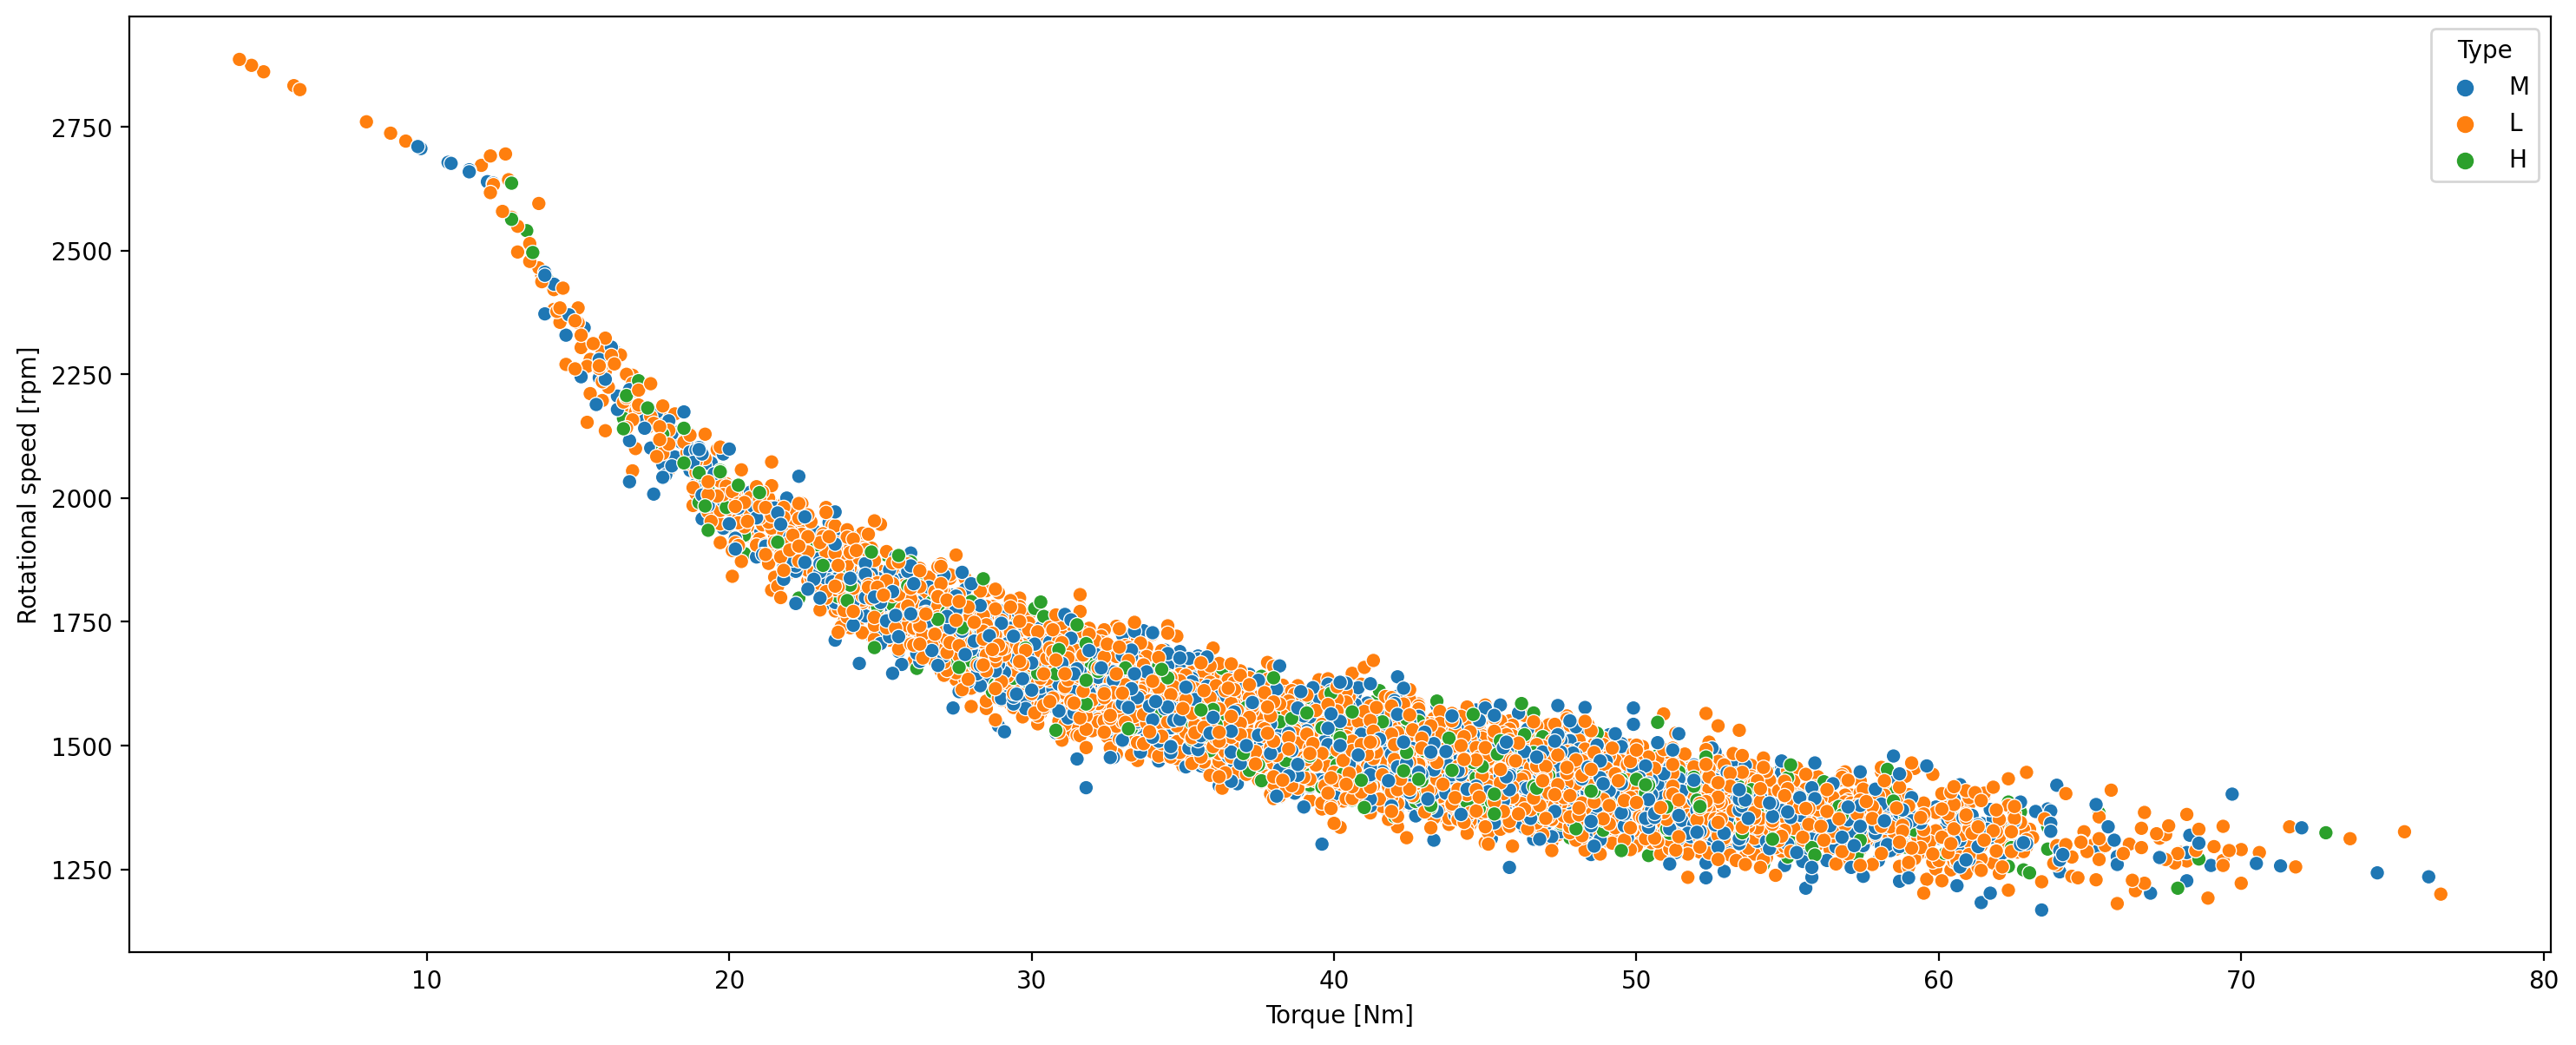

In [13]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="tab10");

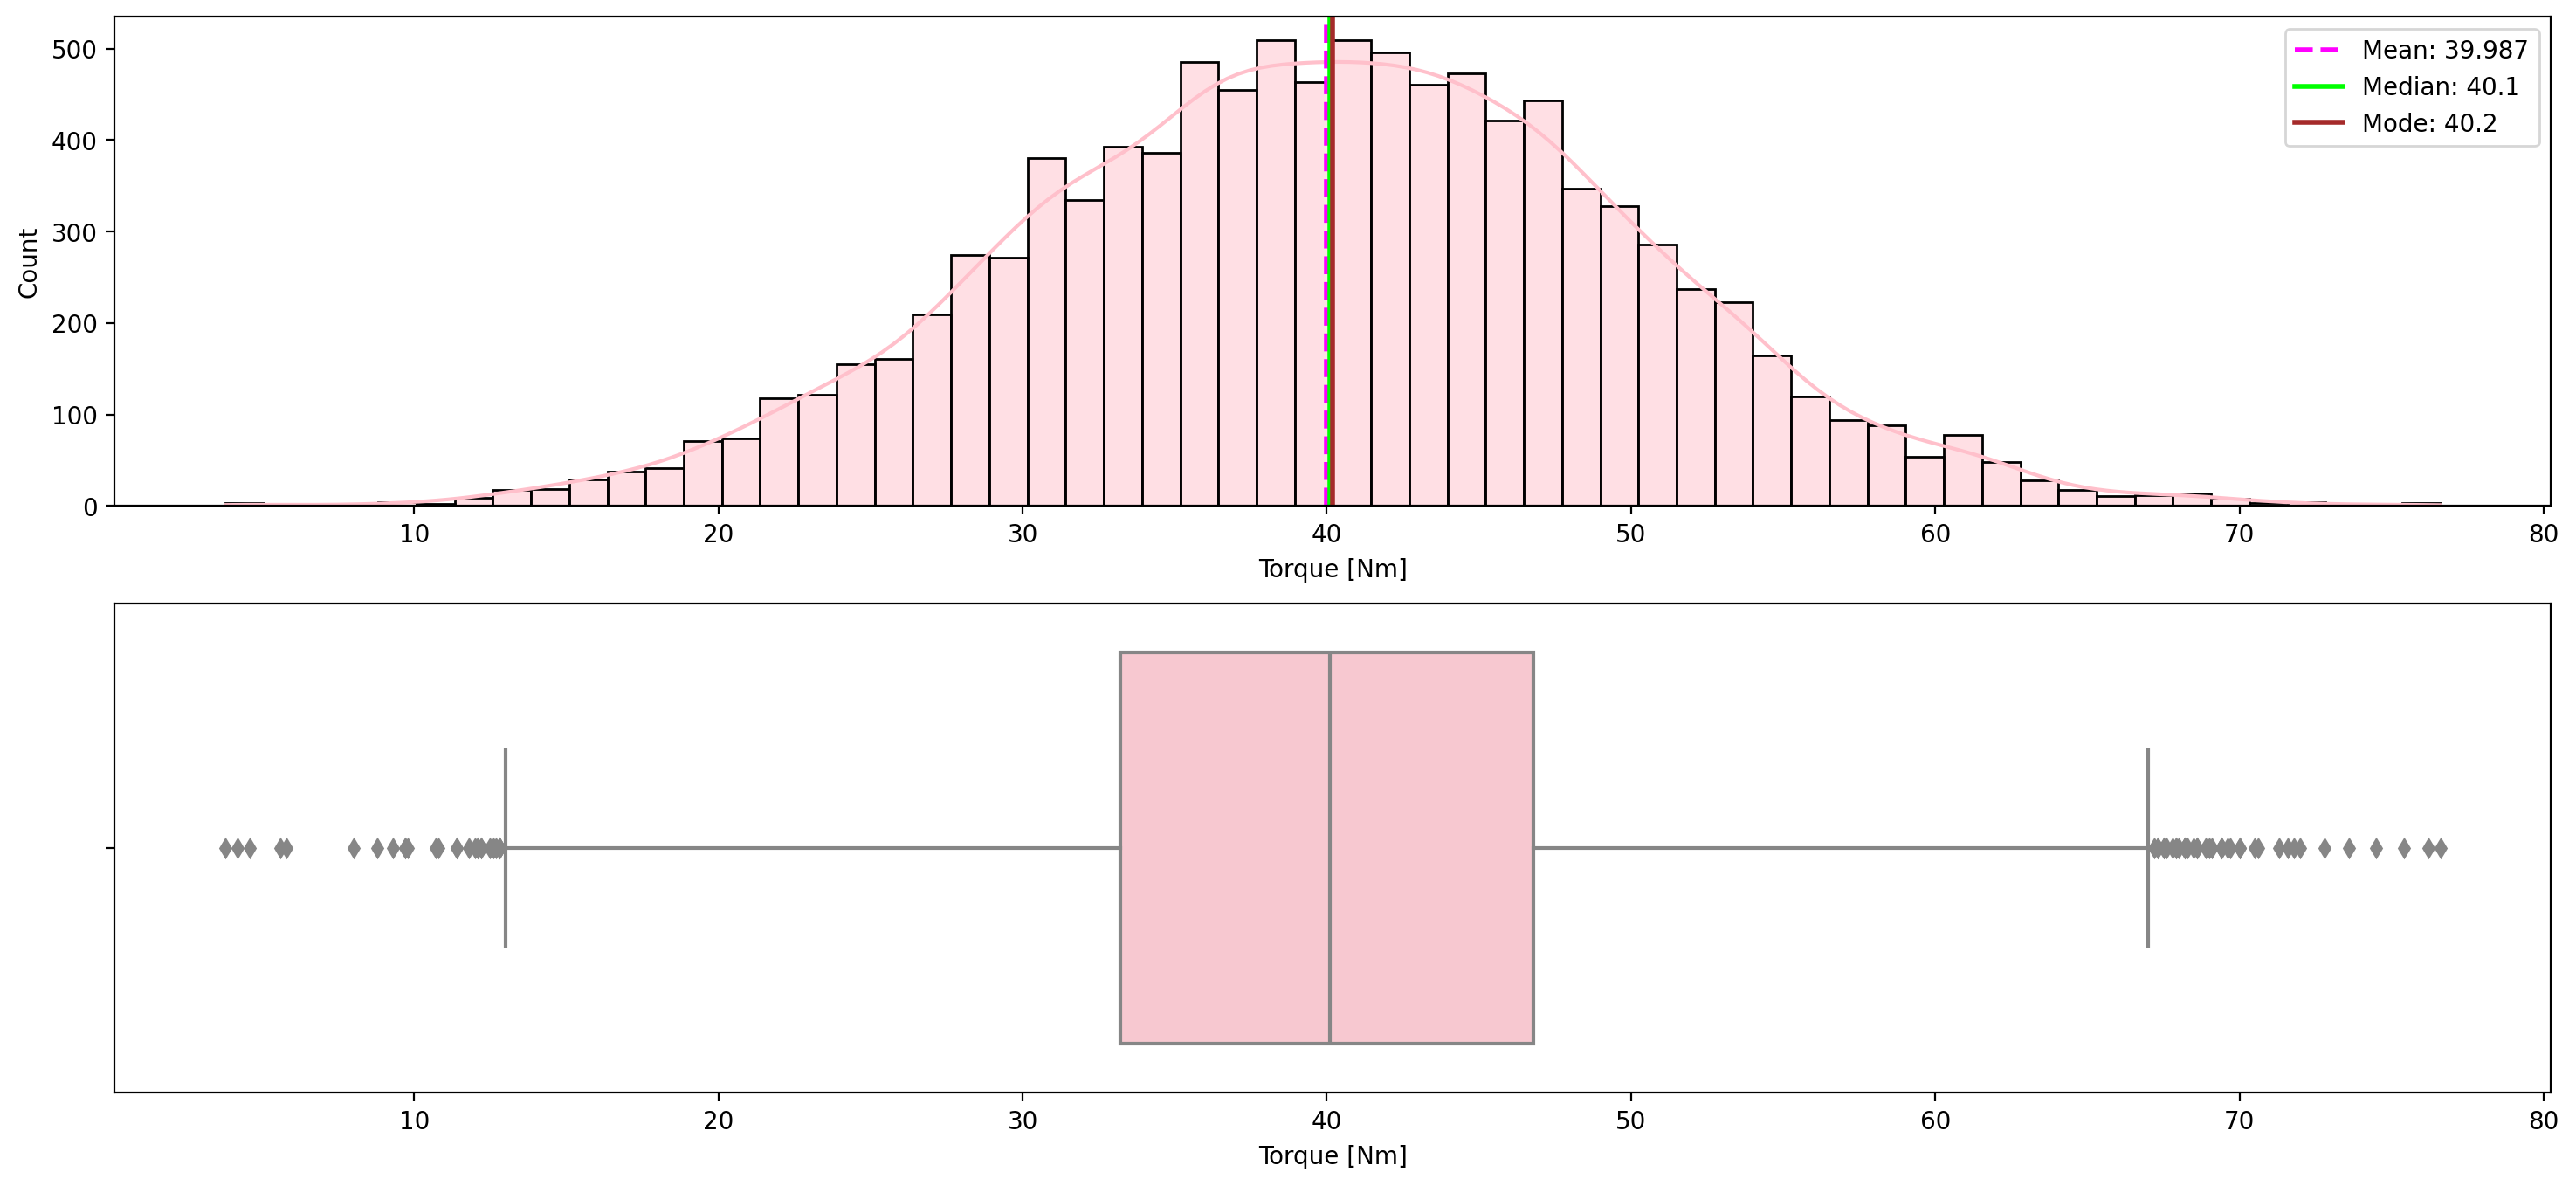

In [14]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='pink')

    ax[0].axvline(x = df[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='pink')
    
    plt.show()

plot_hist('Torque [Nm]')

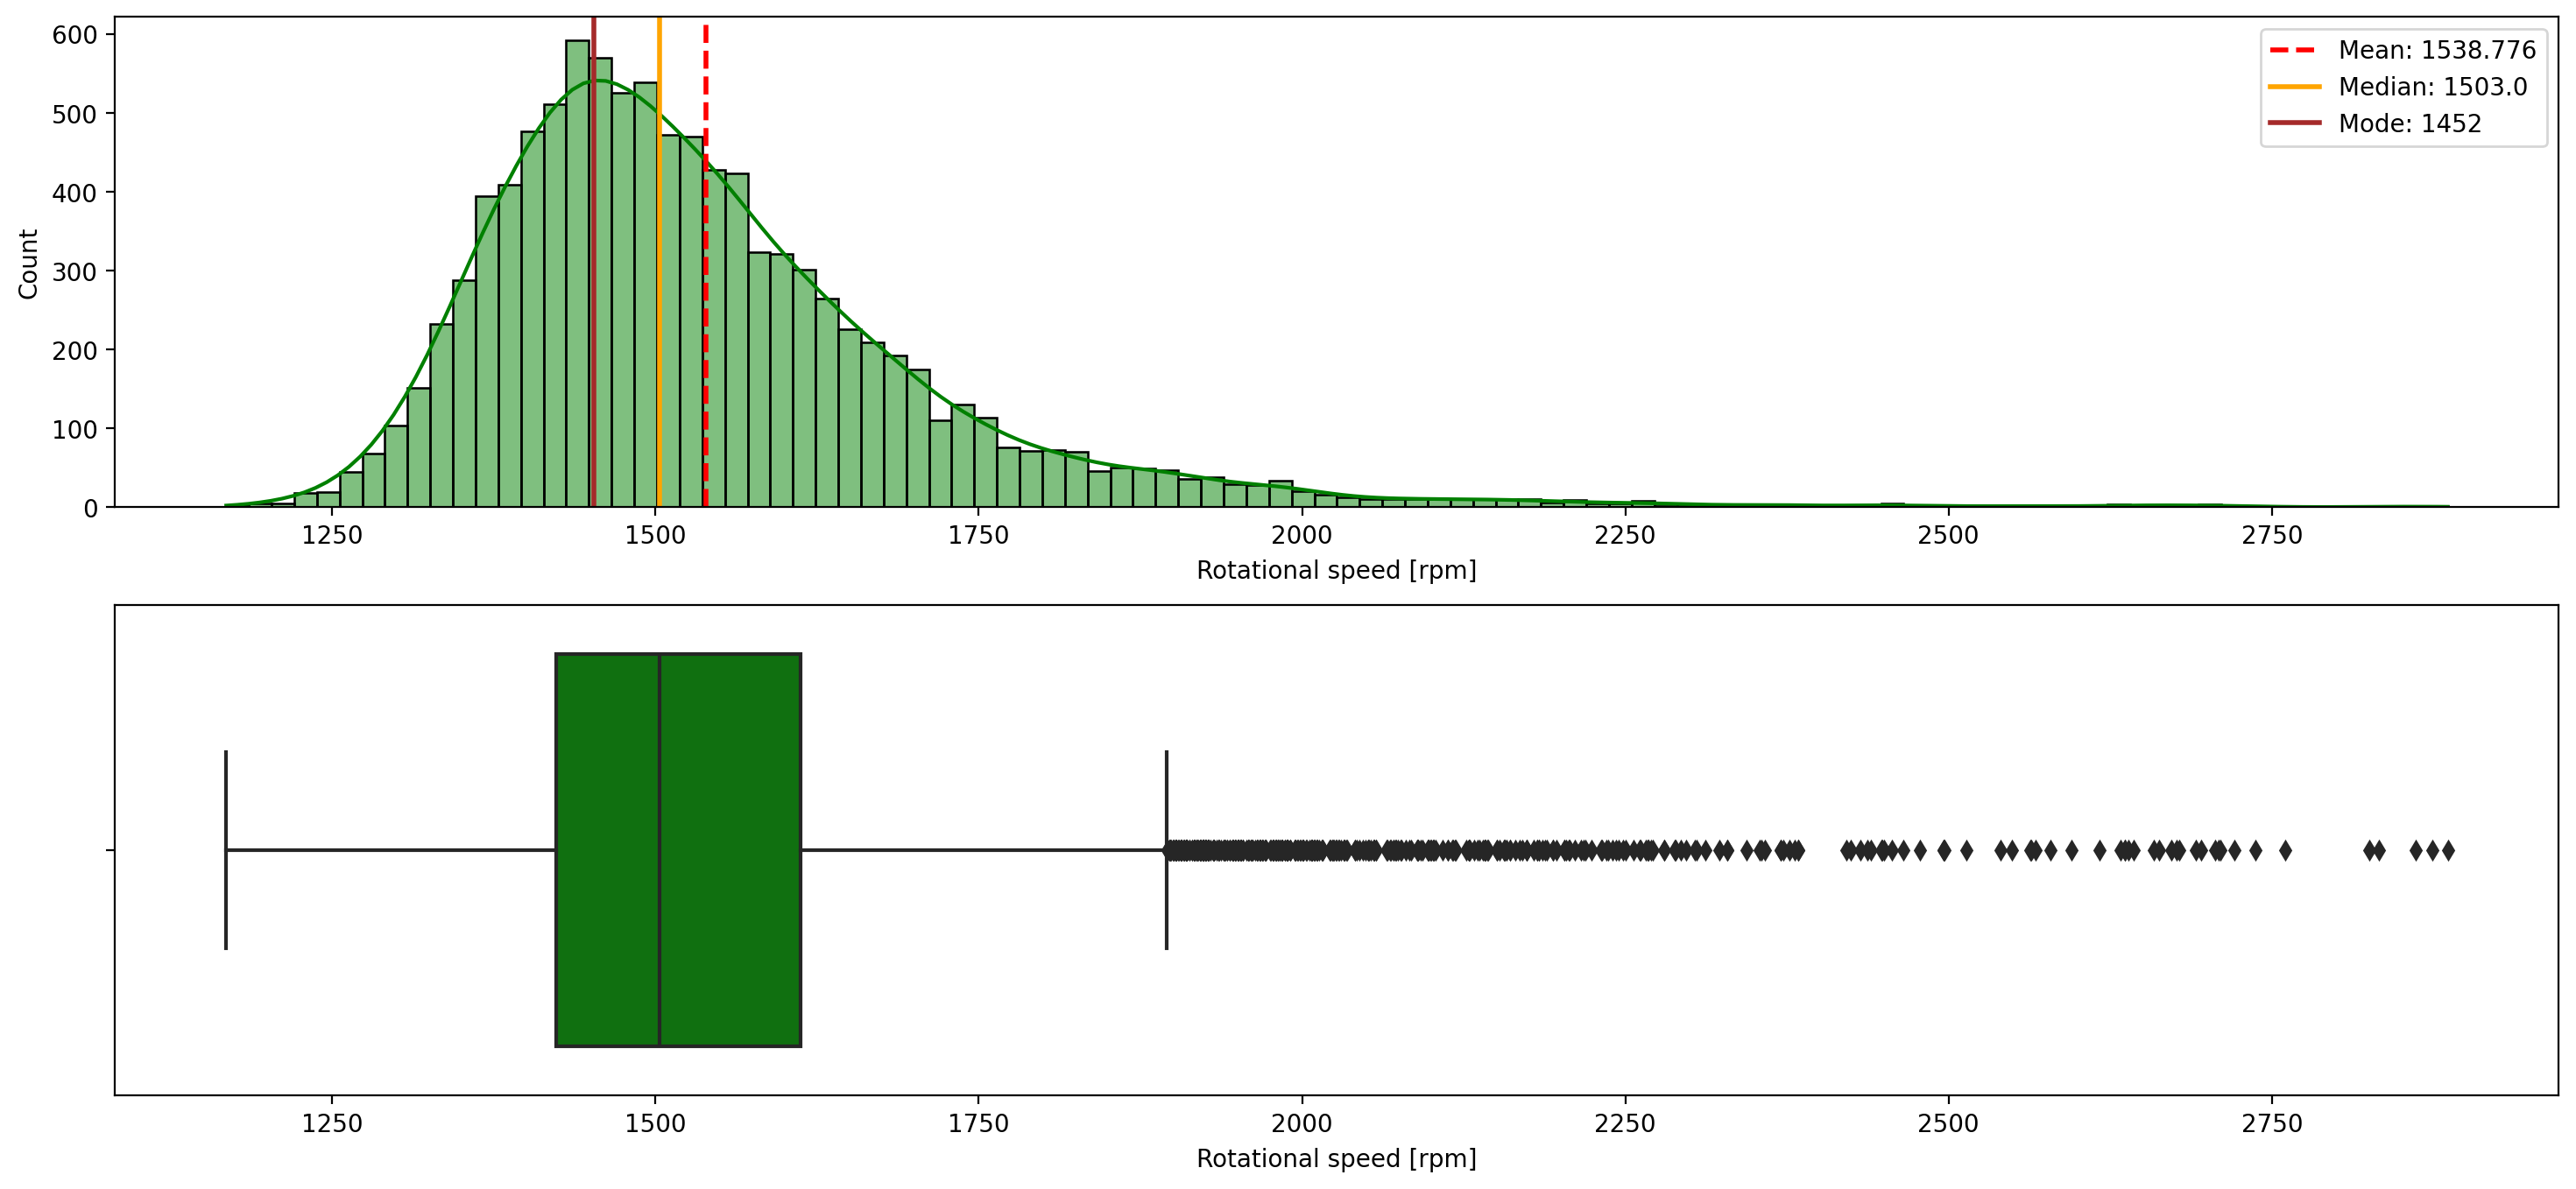

In [15]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='green')

    ax[0].axvline(x = df[feature].mean(), color = 'red', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'orange', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='green')
    
    plt.show()

plot_hist('Rotational speed [rpm]')

In [16]:
 #sns.pairplot(df,hue = "Machine failure");

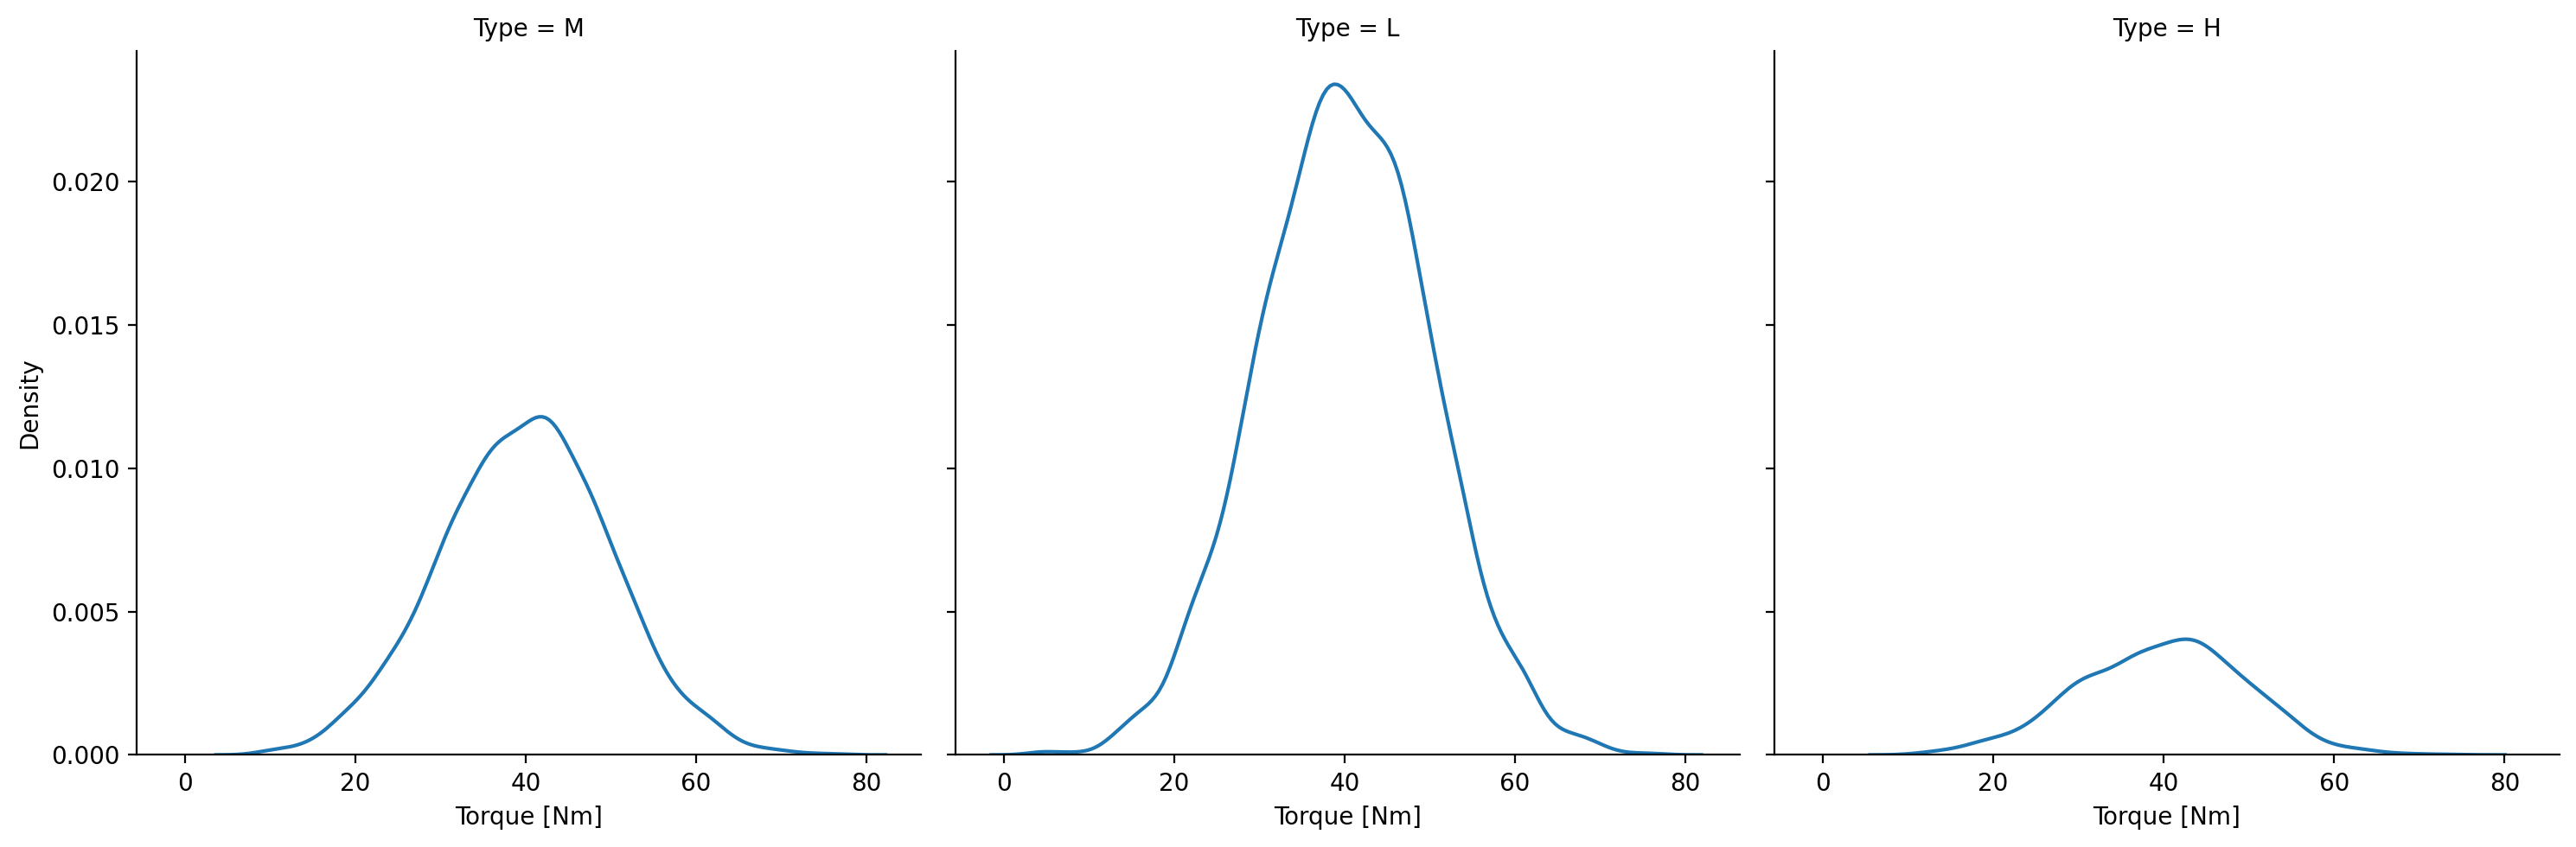

In [17]:
sns.displot(data=df, x="Torque [Nm]", col="Type", kind="kde");

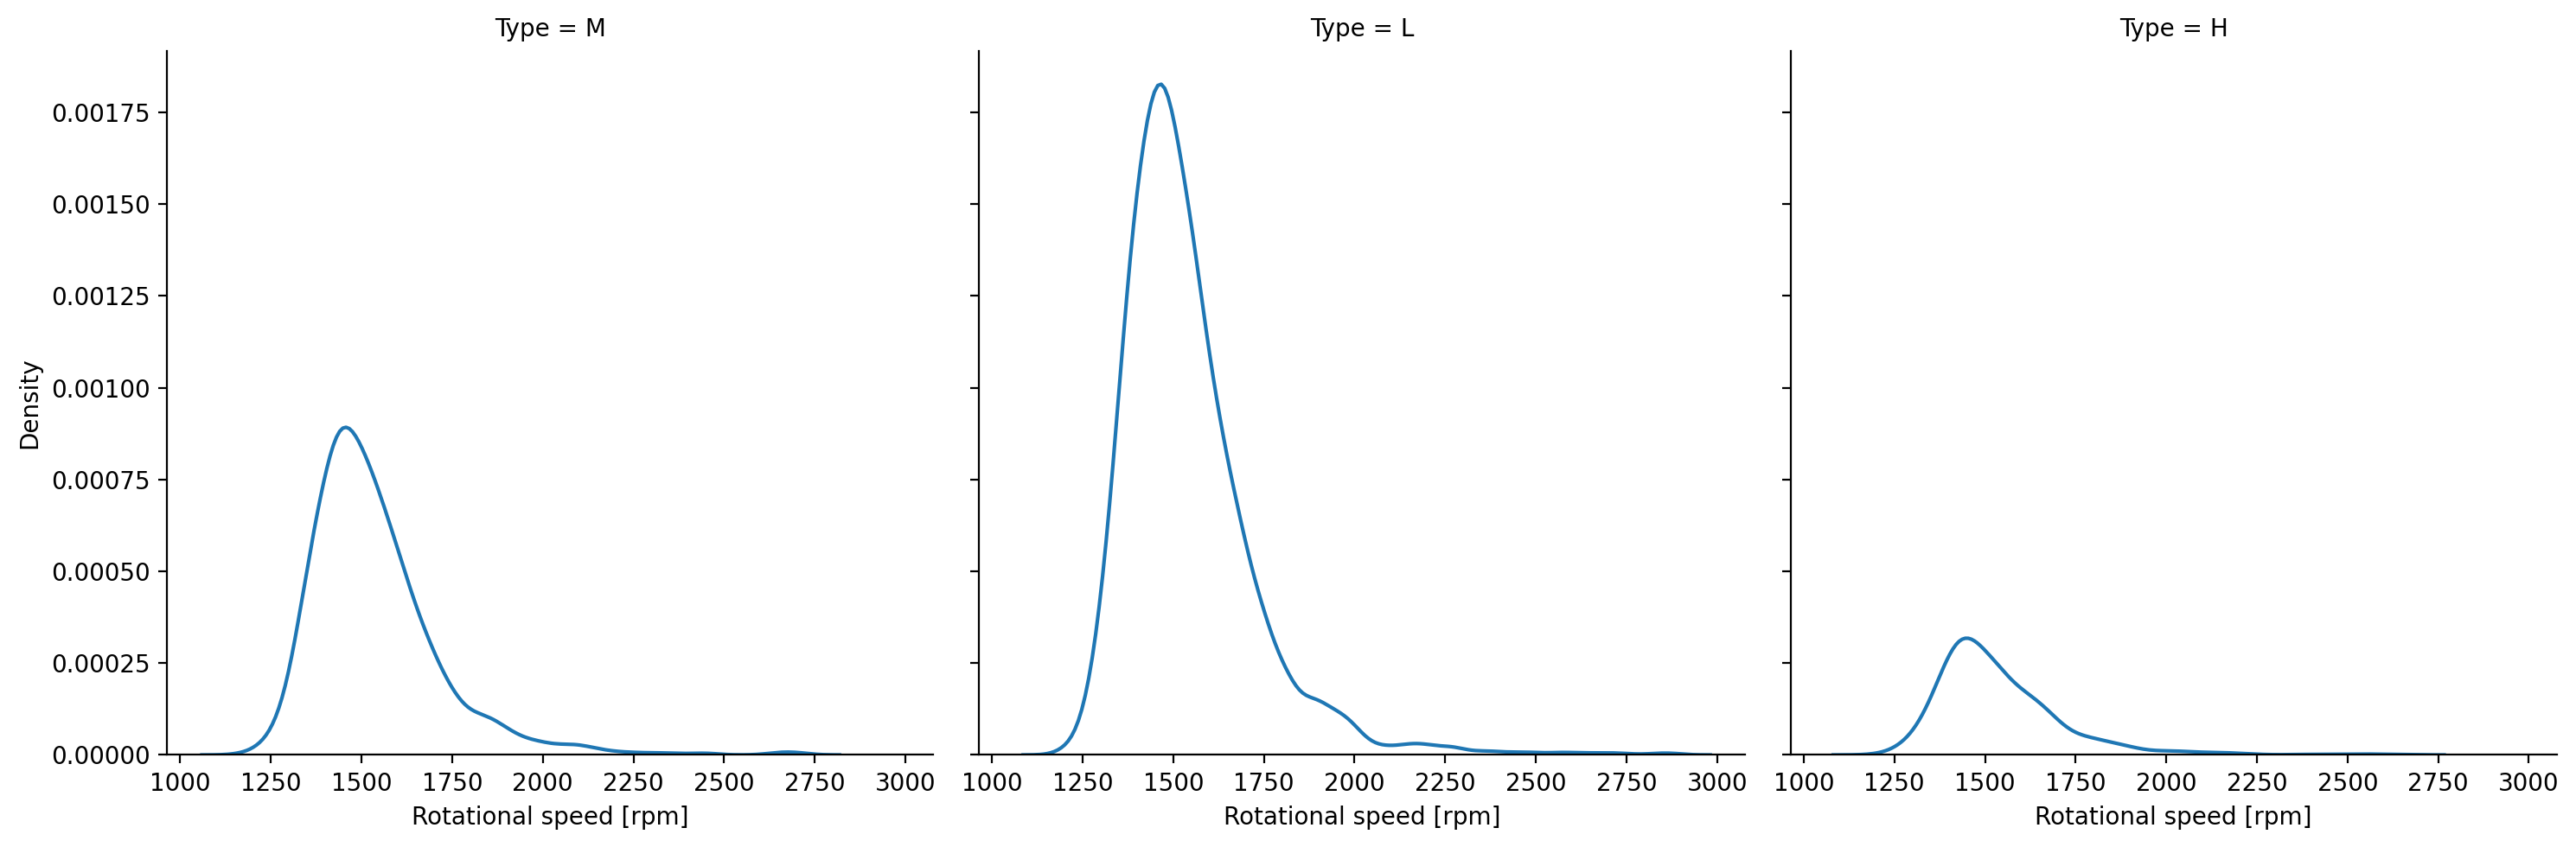

In [18]:
sns.displot(data=df, x="Rotational speed [rpm]", col="Type", kind="kde");

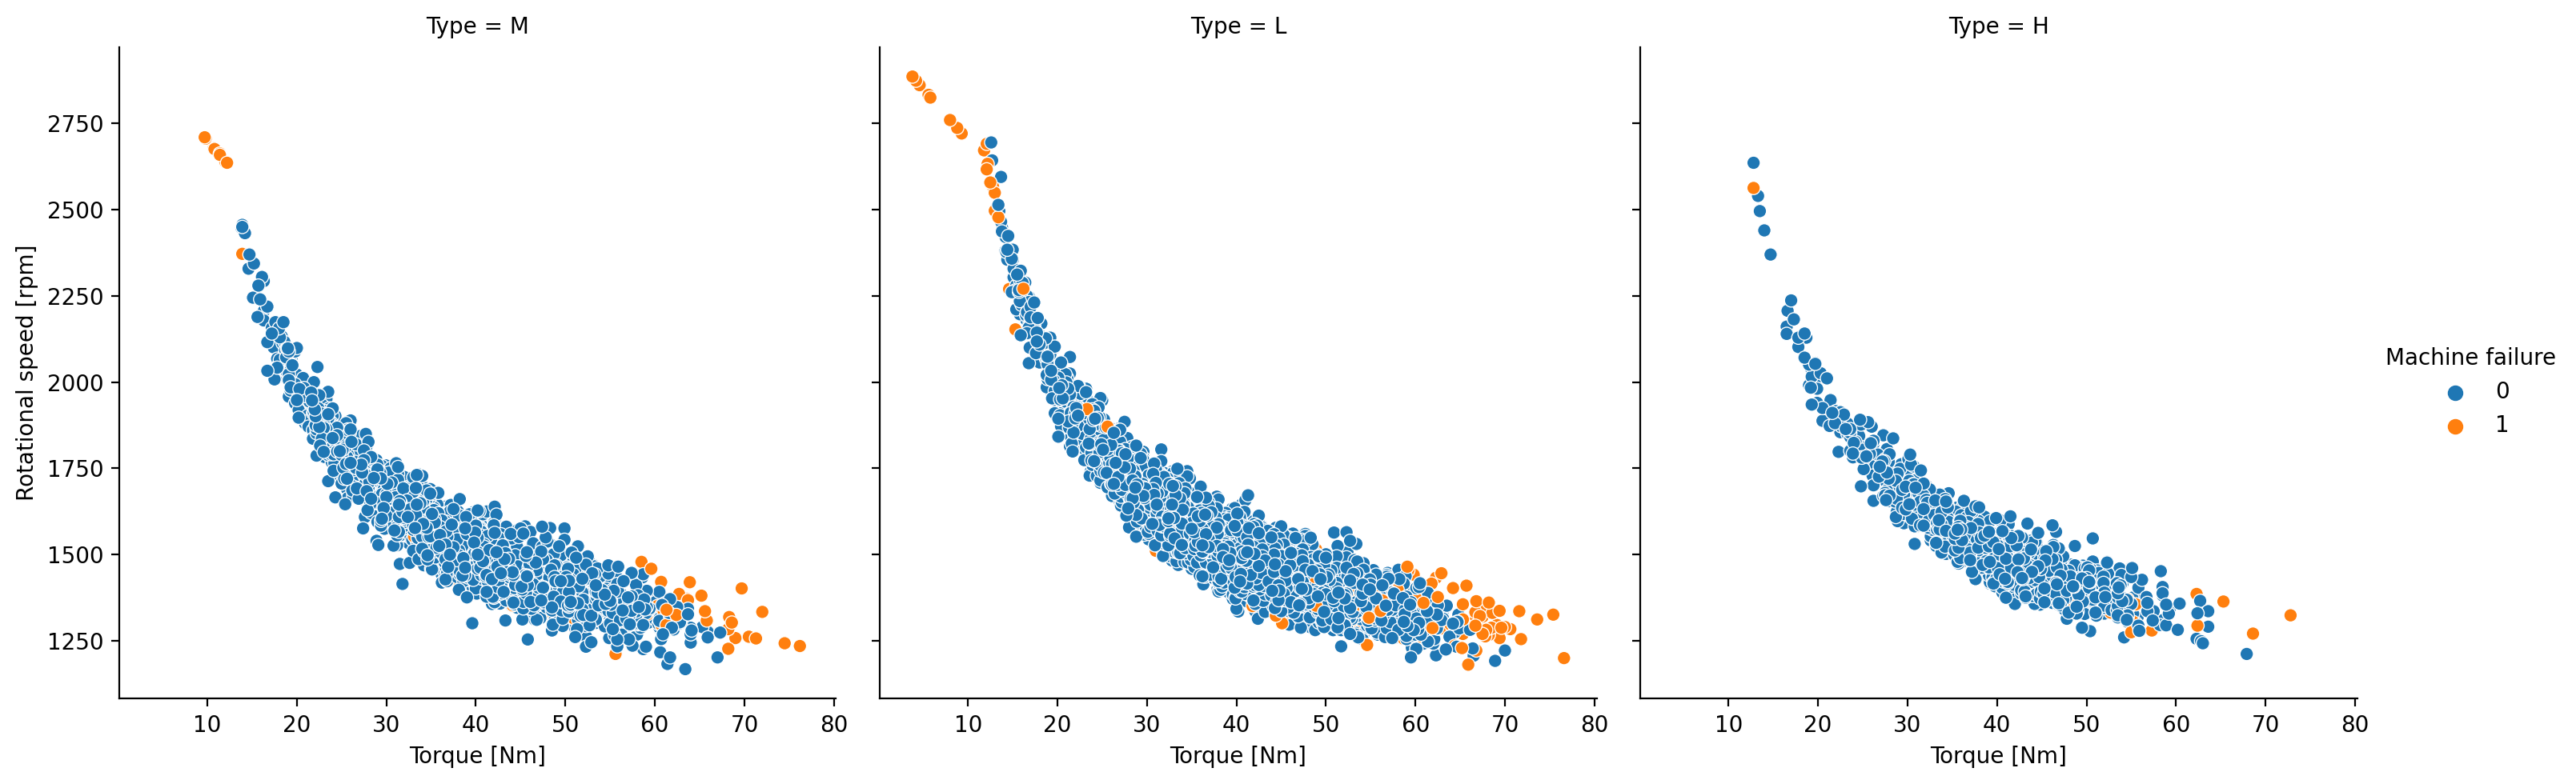

In [19]:
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Machine failure",col="Type",palette='tab10');

In [20]:
#making sure that there are no missing values hidden as a question mark
df.replace("?",np.nan,inplace=True)

In [21]:
#Drop the indices as these have no predictive power
df.drop(['Product ID','UDI','Type'], axis=1, inplace=True)
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


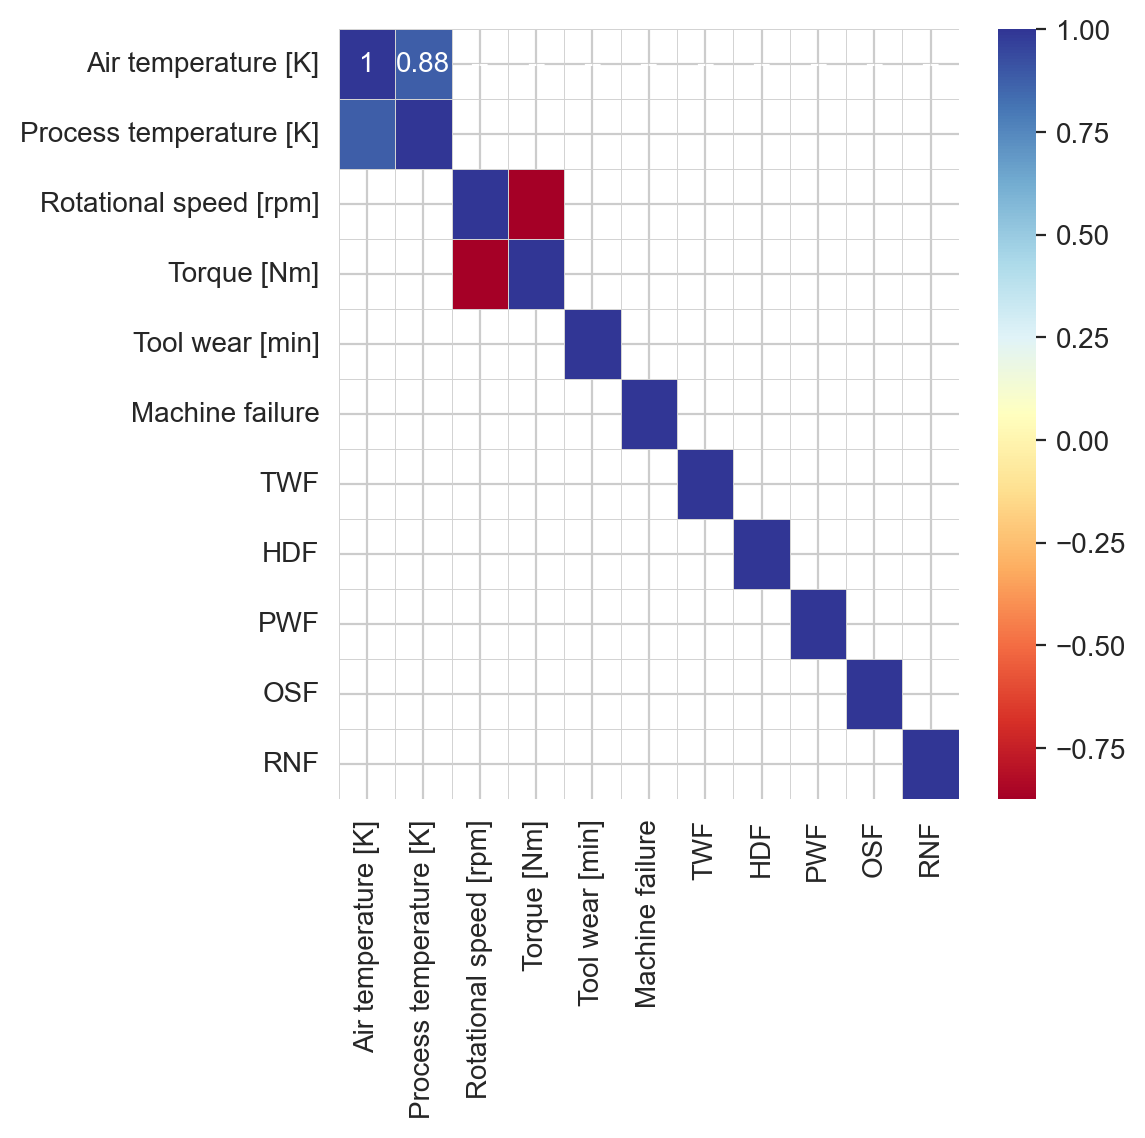

In [22]:
plt.figure(figsize=(5,5))
threshold = 0.80
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

There are strongly correlated features namely process and air temperature. Torque and rotational speed are also strongly correlated. We can drop one of the temperatures, but the torque to rotational speed difference might be an indication of a failure, so we'll keep both.

In [23]:
#Drop the failure modes, as we're only interested whether something is a failure.
df.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1,inplace=True)

In [24]:
list(df)

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure']

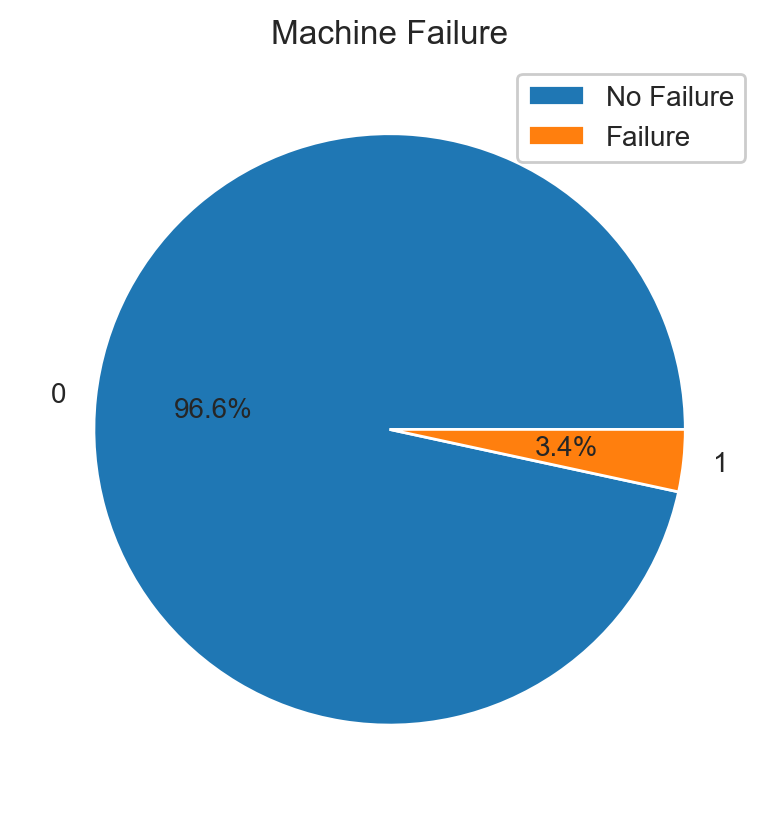

In [25]:
import matplotlib.pyplot as plt

df_group = df.groupby(['Machine failure'])
count_per_group = df_group.size()

# Create the pie chart
plt.pie(count_per_group.values, labels=count_per_group.index, autopct='%1.1f%%')

# Set the title
plt.title( 'Machine Failure')

# Add a legend/key with a white background
legend_labels = ['No Failure', 'Failure']
legend = plt.legend(legend_labels, loc='upper right', framealpha=1)
legend.set_frame_on(True)
legend.get_frame().set_facecolor('white')

# Show the pie chart
plt.show()

According to the graph, 96% of the time the machine was operating perfectly fine. Therefore our dataset is imbalanced

<a id='3'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Pre-processing and Feature Selection</b>

In [26]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


In [27]:
import pandas as pd
import plotly.graph_objects as go

# Calculate the correlation coefficients between features and target variable
correlation_scores = df.iloc[:, :-1].corrwith(df.iloc[:, -1])

# Create a DataFrame to store the feature scores
feature_scores = pd.DataFrame(correlation_scores)
feature_scores.columns = ['score']
feature_scores['feature'] = feature_scores.index

# Sort the features by their scores in descending order
feature_scores.sort_values(by='score', ascending=False, inplace=True)

fig = go.Figure(go.Bar(
            x=feature_scores['score'][0:20],
            y=feature_scores['feature'][0:20],
            orientation='h'))

fig.update_layout(title="Top 20 Features based on Correlation",
                  height=500,
                  showlegend=False)

fig.show()

In [28]:
selected_features = feature_scores['feature'][0:20]
print("Selected Features:")
print(selected_features)

Selected Features:
Torque [Nm]                            Torque [Nm]
Tool wear [min]                    Tool wear [min]
Air temperature [K]            Air temperature [K]
Process temperature [K]    Process temperature [K]
Rotational speed [rpm]      Rotational speed [rpm]
Name: feature, dtype: object


In [29]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [30]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(10000, 5)

In [31]:
np.shape(X)

(10000, 5)

In [32]:
len(feature_names)

5

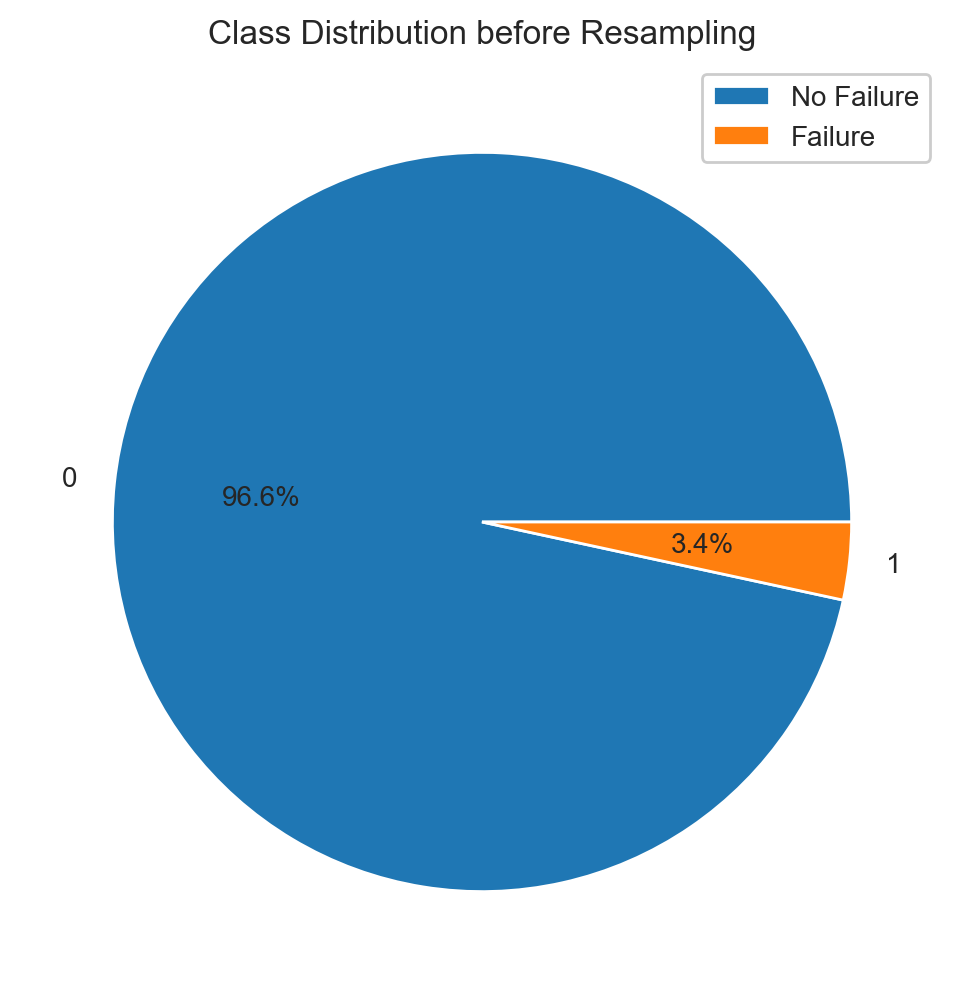

In [33]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you have the original class labels in y

# Check the original class distribution
class_distribution = Counter(y)

# Get the class labels and their counts
labels = class_distribution.keys()
counts = class_distribution.values()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# Set the title
plt.title('Class Distribution before Resampling')
legend_labels = ['No Failure', 'Failure']
legend = plt.legend(legend_labels, loc='upper right', framealpha=1)
legend.set_frame_on(True)
legend.get_frame().set_facecolor('white')

# Show the pie chart
plt.show()

In [34]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(10000, 5)

In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply oversampling to the minority class in the training set
oversampler = SMOTE()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Apply undersampling to the majority class in the training set
undersampler = RandomUnderSampler()
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

# Check the class distribution after resampling
class_distribution = Counter(y_train_resampled)
for class_label, count in class_distribution.items():
    print(f"Class {class_label}: {count}")

Class 0: 7722
Class 1: 7722


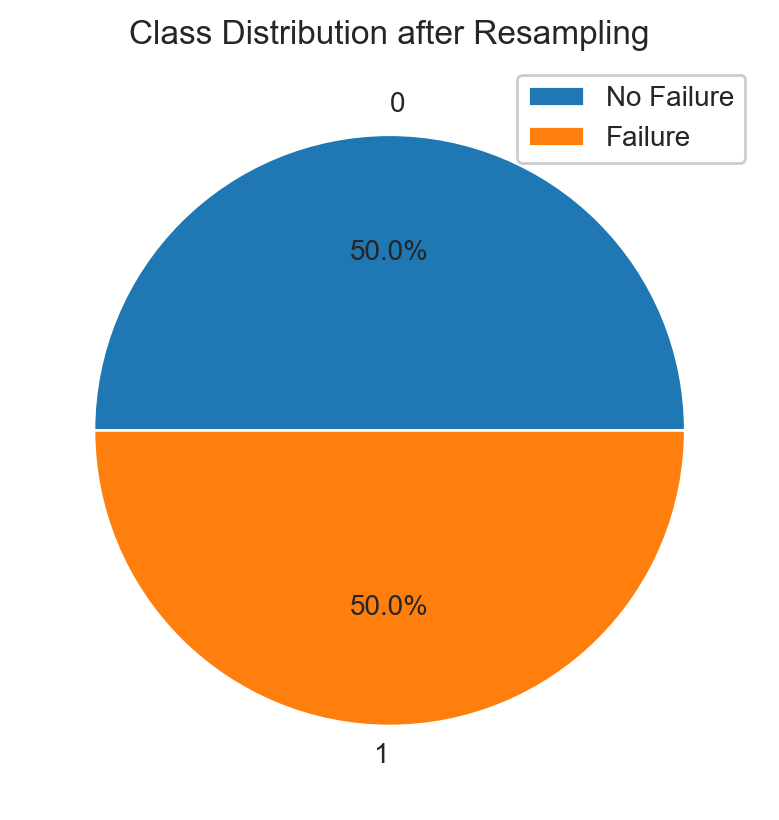

In [36]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you have X_resampled and y_resampled after applying resampling techniques

# Check the class distribution after resampling
class_distribution = Counter(y_train_resampled)

# Get the class labels and their counts
labels = class_distribution.keys()
counts = class_distribution.values()

# Create the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# Set the title
plt.title('Class Distribution after Resampling')
legend_labels = ['No Failure', 'Failure']
legend = plt.legend(legend_labels, loc='upper right', framealpha=1)
legend.set_frame_on(True)
legend.get_frame().set_facecolor('white')


# Show the pie chart
plt.show()

In [37]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score', 'Training time',
                                          'Prediction time'])

def log_scores(model_name, y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    precision = precision_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')

    # save the scores in model_performance dataframe
    model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                       end_train-start, end_predict-end_train]

<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Support Vector Machines</b>

In [38]:
from sklearn.svm import SVC
import time

start = time.time()

model = SVC().fit(X_train, y_train)

end_train = time.time()

y_predictions = model.predict(X_test)

end_predict = time.time()

total_train_time = end_train - start
total_predict_time = end_predict - end_train

print("Training time:", total_train_time)
print("Prediction time:", total_predict_time)

Training time: 0.8589334487915039
Prediction time: 0.2887544631958008


In [39]:
from sklearn.metrics import classification_report

print("Support Vector Machine\n" + classification_report(y_test, y_predictions))

Support Vector Machine
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1939
           1       1.00      0.03      0.06        61

    accuracy                           0.97      2000
   macro avg       0.99      0.52      0.52      2000
weighted avg       0.97      0.97      0.96      2000



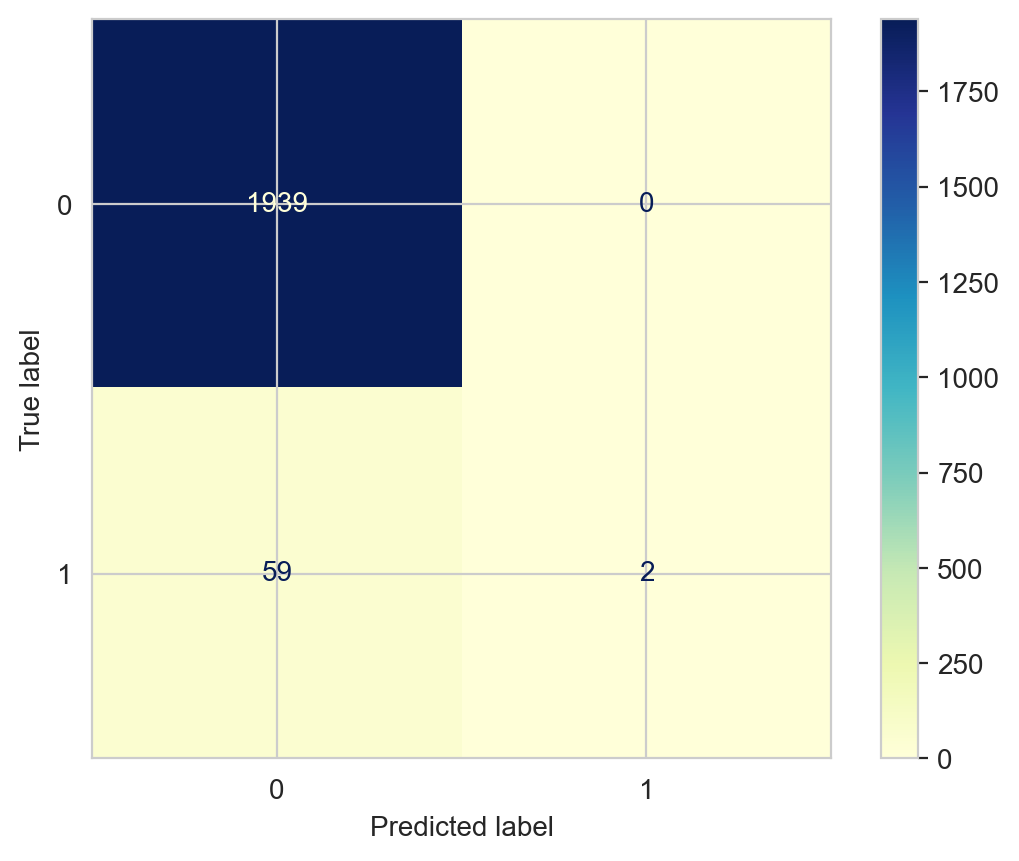

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu) 

<a id='4_2'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Logistical Classification</b>

In [41]:
import time
from sklearn.linear_model import LogisticRegression

start = time.time()
model = LogisticRegression().fit(X_train, y_train)
end_train = time.time()

y_predictions = model.predict(X_test)  # These are the predictions from the test data.
end_predict = time.time()

In [42]:
print("LogisticRegression\n" + classification_report(y_test, y_predictions))

LogisticRegression
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.62      0.26      0.37        61

    accuracy                           0.97      2000
   macro avg       0.80      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000



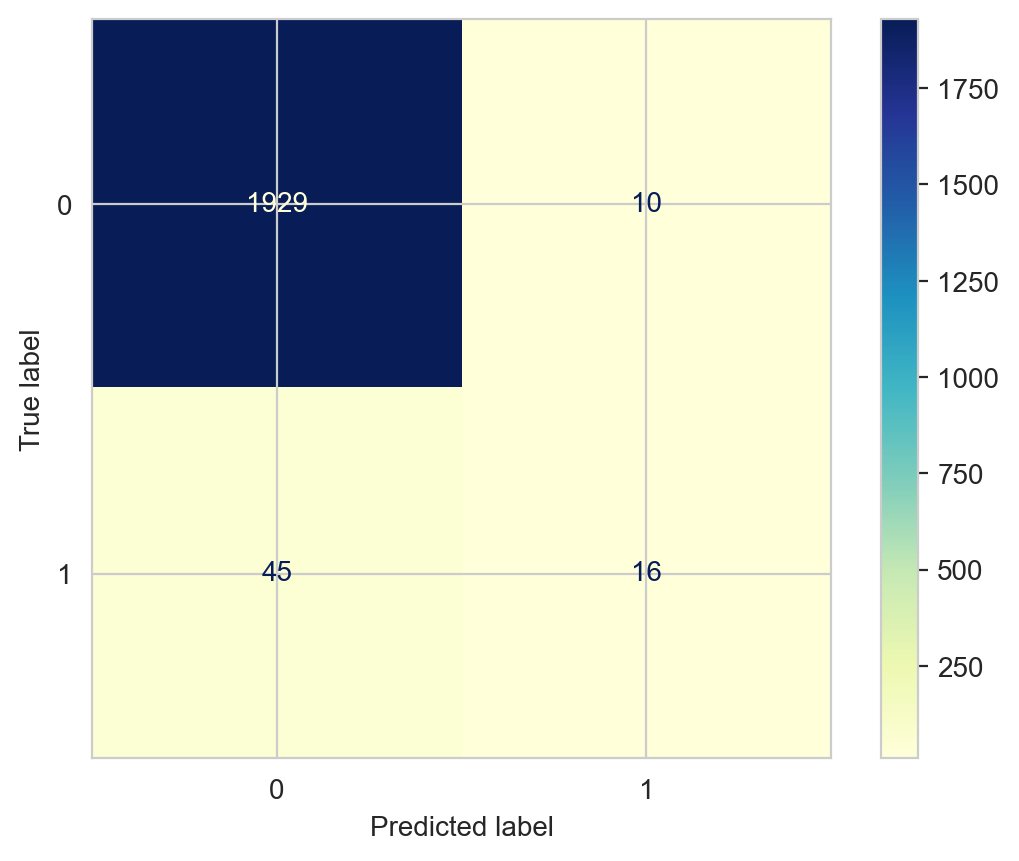

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu) 

<a id='4_3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Decision Tree</b>

In [44]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 93.8 ms
Wall time: 98.8 ms


In [45]:
from sklearn.metrics import classification_report

print("Decision Tree\n" + classification_report(y_test, y_predictions))

Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.66      0.72      0.69        61

    accuracy                           0.98      2000
   macro avg       0.82      0.85      0.84      2000
weighted avg       0.98      0.98      0.98      2000



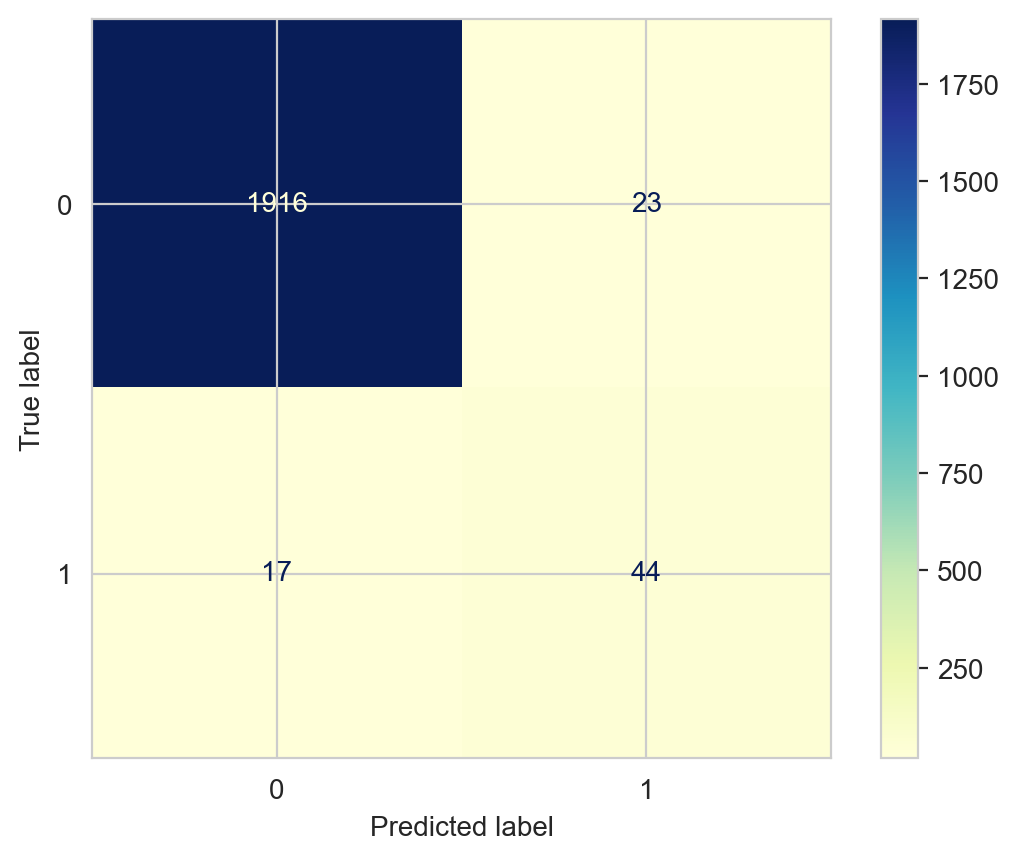

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu) 

<a id='4_4'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Random Forest</b>

In [47]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 3.59 s
Wall time: 985 ms


In [48]:
print("RandomForest\n" + classification_report(y_test, y_predictions))

RandomForest
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.80      0.59      0.68        61

    accuracy                           0.98      2000
   macro avg       0.89      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000



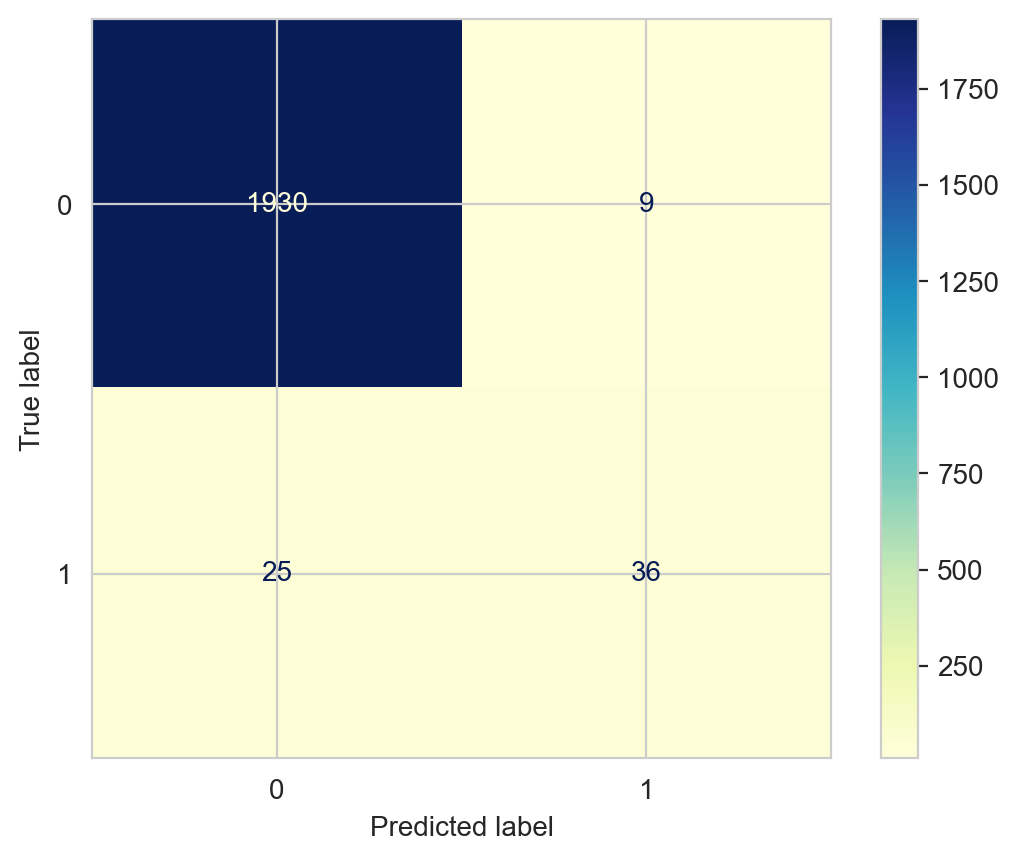

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu) 

<a id='4_5'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Gradient Boosting Classifier</b>

In [50]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 1.89 s
Wall time: 1.88 s


In [51]:
print("GradientBoosting\n" + classification_report(y_test, y_predictions))

GradientBoosting
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.84      0.59      0.69        61

    accuracy                           0.98      2000
   macro avg       0.91      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000



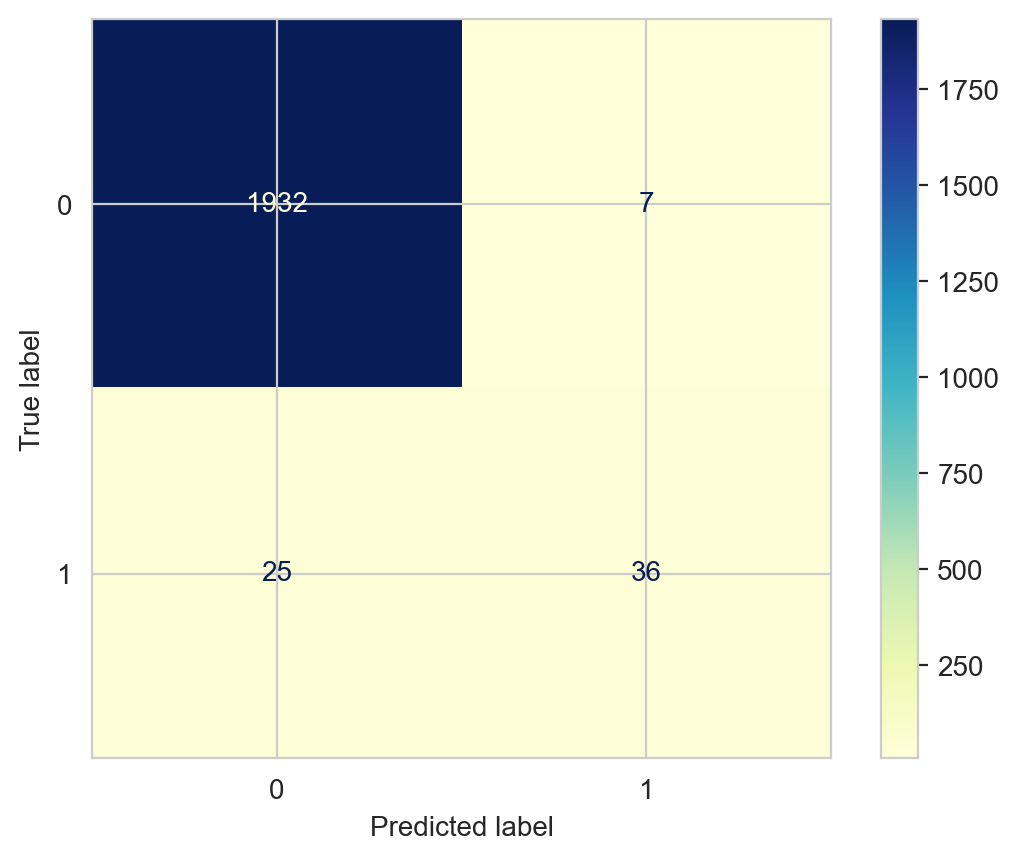

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu) 

<a id='4_6'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Neural Network MLP</b>

In [53]:
%%time
from sklearn.neural_network import MLPClassifier
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (100,100,), 
                      activation='relu', 
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 15.2 s
Wall time: 3.87 s


In [54]:

print("Multi-layer Perceptron\n" + classification_report(y_test, y_predictions))

Multi-layer Perceptron
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.77      0.39      0.52        61

    accuracy                           0.98      2000
   macro avg       0.88      0.69      0.76      2000
weighted avg       0.97      0.98      0.97      2000



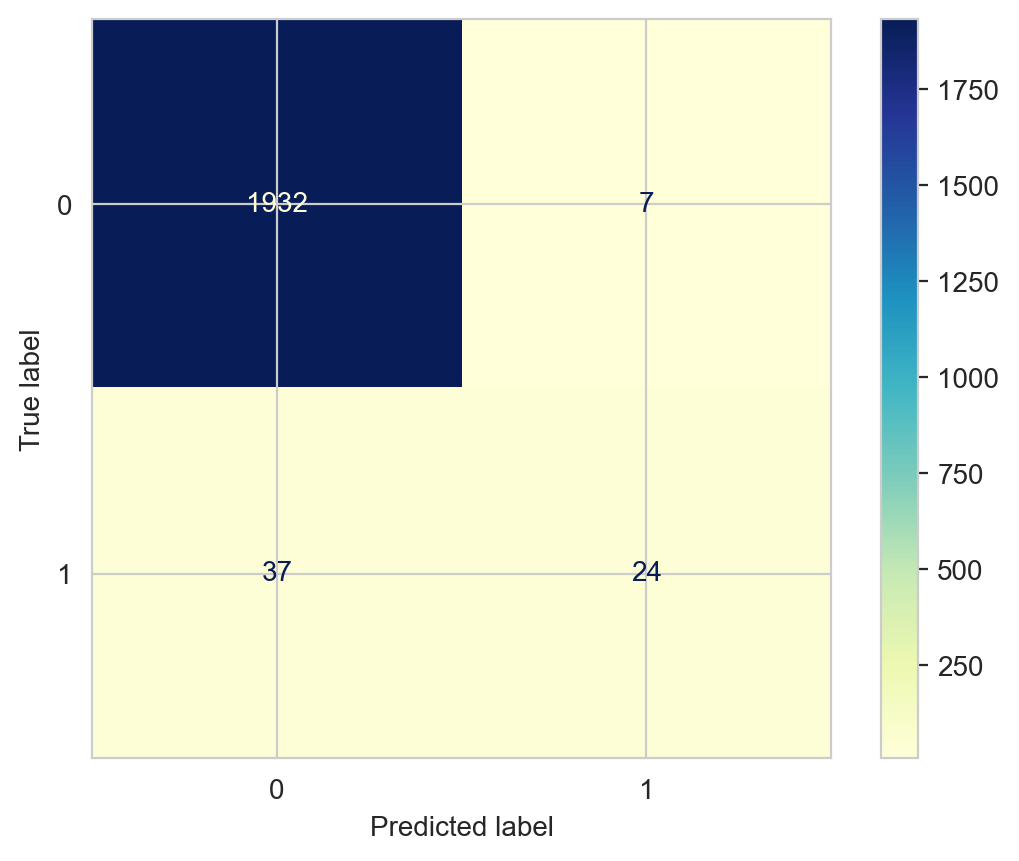

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu) 

In [56]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Define the base models
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = GradientBoostingClassifier()
model4 = LogisticRegression()
model5 = SVC()
model6 = MLPClassifier()

# Train the base models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)

# Generate predictions from the base models
pred1 = model1.predict(X_train)
pred2 = model2.predict(X_train)
pred3 = model3.predict(X_train)
pred4 = model4.predict(X_train)
pred5 = model5.predict(X_train)
pred6 = model6.predict(X_train)

# Create a new feature matrix with the predictions as input
new_X_train = np.column_stack((pred1, pred2, pred3, pred4, pred5, pred6))

# Train the meta-model (e.g., logistic regression) on the new feature matrix
meta_model = LogisticRegression()
meta_model.fit(new_X_train, y_train)

# Generate predictions from the base models on the test set
pred1_test = model1.predict(X_test)
pred2_test = model2.predict(X_test)
pred3_test = model3.predict(X_test)
pred4_test = model4.predict(X_test)
pred5_test = model5.predict(X_test)
pred6_test = model6.predict(X_test)

# Create a new feature matrix for the test set
new_X_test = np.column_stack((pred1_test, pred2_test, pred3_test, pred4_test, pred5_test, pred6_test))

# Use the meta-model to make predictions on the new feature matrix
ensemble_pred = meta_model.predict(new_X_test)

# Calculate the performance metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_pred)
precision = precision_score(y_test, ensemble_pred)
recall = recall_score(y_test, ensemble_pred)
f1 = f1_score(y_test, ensemble_pred)


# Print the performance metrics
print("Stacking Model Performance:")
print("Accuracy: {:.2%}".format(accuracy))
print("Recall: {:.2%}".format(recall))
print("Precision: {:.2%}".format(precision))
print("F1-Score: {:.2%}".format(f1))


Stacking Model Performance:
Accuracy: 98.50%
Recall: 59.02%
Precision: 87.80%
F1-Score: 70.59%


In [57]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a synthetic classification dataset for demonstration
X, y = make_classification(random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the individual models
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = GradientBoostingClassifier()
model4 = LogisticRegression()
model5 = SVC()
model6 = MLPClassifier()

# Create the boosting ensemble model
ensemble = VotingClassifier(
    estimators=[
        ('dt', model1),
        ('rf', model2),
        ('gb', model3),
        ('lr', model4),
        ('svc', model5),
        ('mlp', model6)
    ],
    voting='hard'
)

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred = ensemble.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Boosting Model Performance:")
print("Accuracy: {:.2%}".format(accuracy))
print("Recall: {:.2%}".format(recall))
print("Precision: {:.2%}".format(precision))
print("F1-Score: {:.2%}".format(f1))

Boosting Model Performance:
Accuracy: 90.00%
Recall: 100.00%
Precision: 77.78%
F1-Score: 87.50%


In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a synthetic classification dataset for demonstration
X, y = make_classification(random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the individual models
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = GradientBoostingClassifier()
model4 = LogisticRegression()
model5 = SVC()
model6 = MLPClassifier()

# Create the bagging ensemble model
ensemble = BaggingClassifier(
    base_estimator=model5,  # You can specify a base estimator here, or leave it as None for the default (DecisionTreeClassifier)
    n_estimators=10,  # Number of base estimators in the ensemble
    random_state=42
)

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred = ensemble.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Bagging Model Performance:")
print("Accuracy: {:.2%}".format(accuracy))
print("Recall: {:.2%}".format(recall))
print("Precision: {:.2%}".format(precision))
print("F1-Score: {:.2%}".format(f1))

Bagging Model Performance:
Accuracy: 95.00%
Recall: 100.00%
Precision: 87.50%
F1-Score: 93.33%
